## **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

## **Loading Data**

In [2]:
UnitCareData = pd.read_excel("Dataset/CareUnitData.xlsx")
UnitCareData.shape

(982, 46)

## **Exploring Data**

### **Selecting features and target**

In [3]:
features = ['icu_los_day', 'age', 'weight_first', 'bmi', 'map_1st', 'hr_1st', 'temp_1st', 'spo2_1st',
            'abg_count', 'wbc_first', 'hgb_first', 'platelet_first', 'sodium_first', 'potassium_first', 'tco2_first', 'chloride_first',
            'bun_first', 'creatinine_first', 'po2_first', 'pco2_first', 'iv_day_1']

target = 'icu_exp_flg'

In [4]:
x = UnitCareData.loc[:,features]

In [5]:
print("Features shape:", x.shape)

Features shape: (982, 21)


### **Features Correlation**

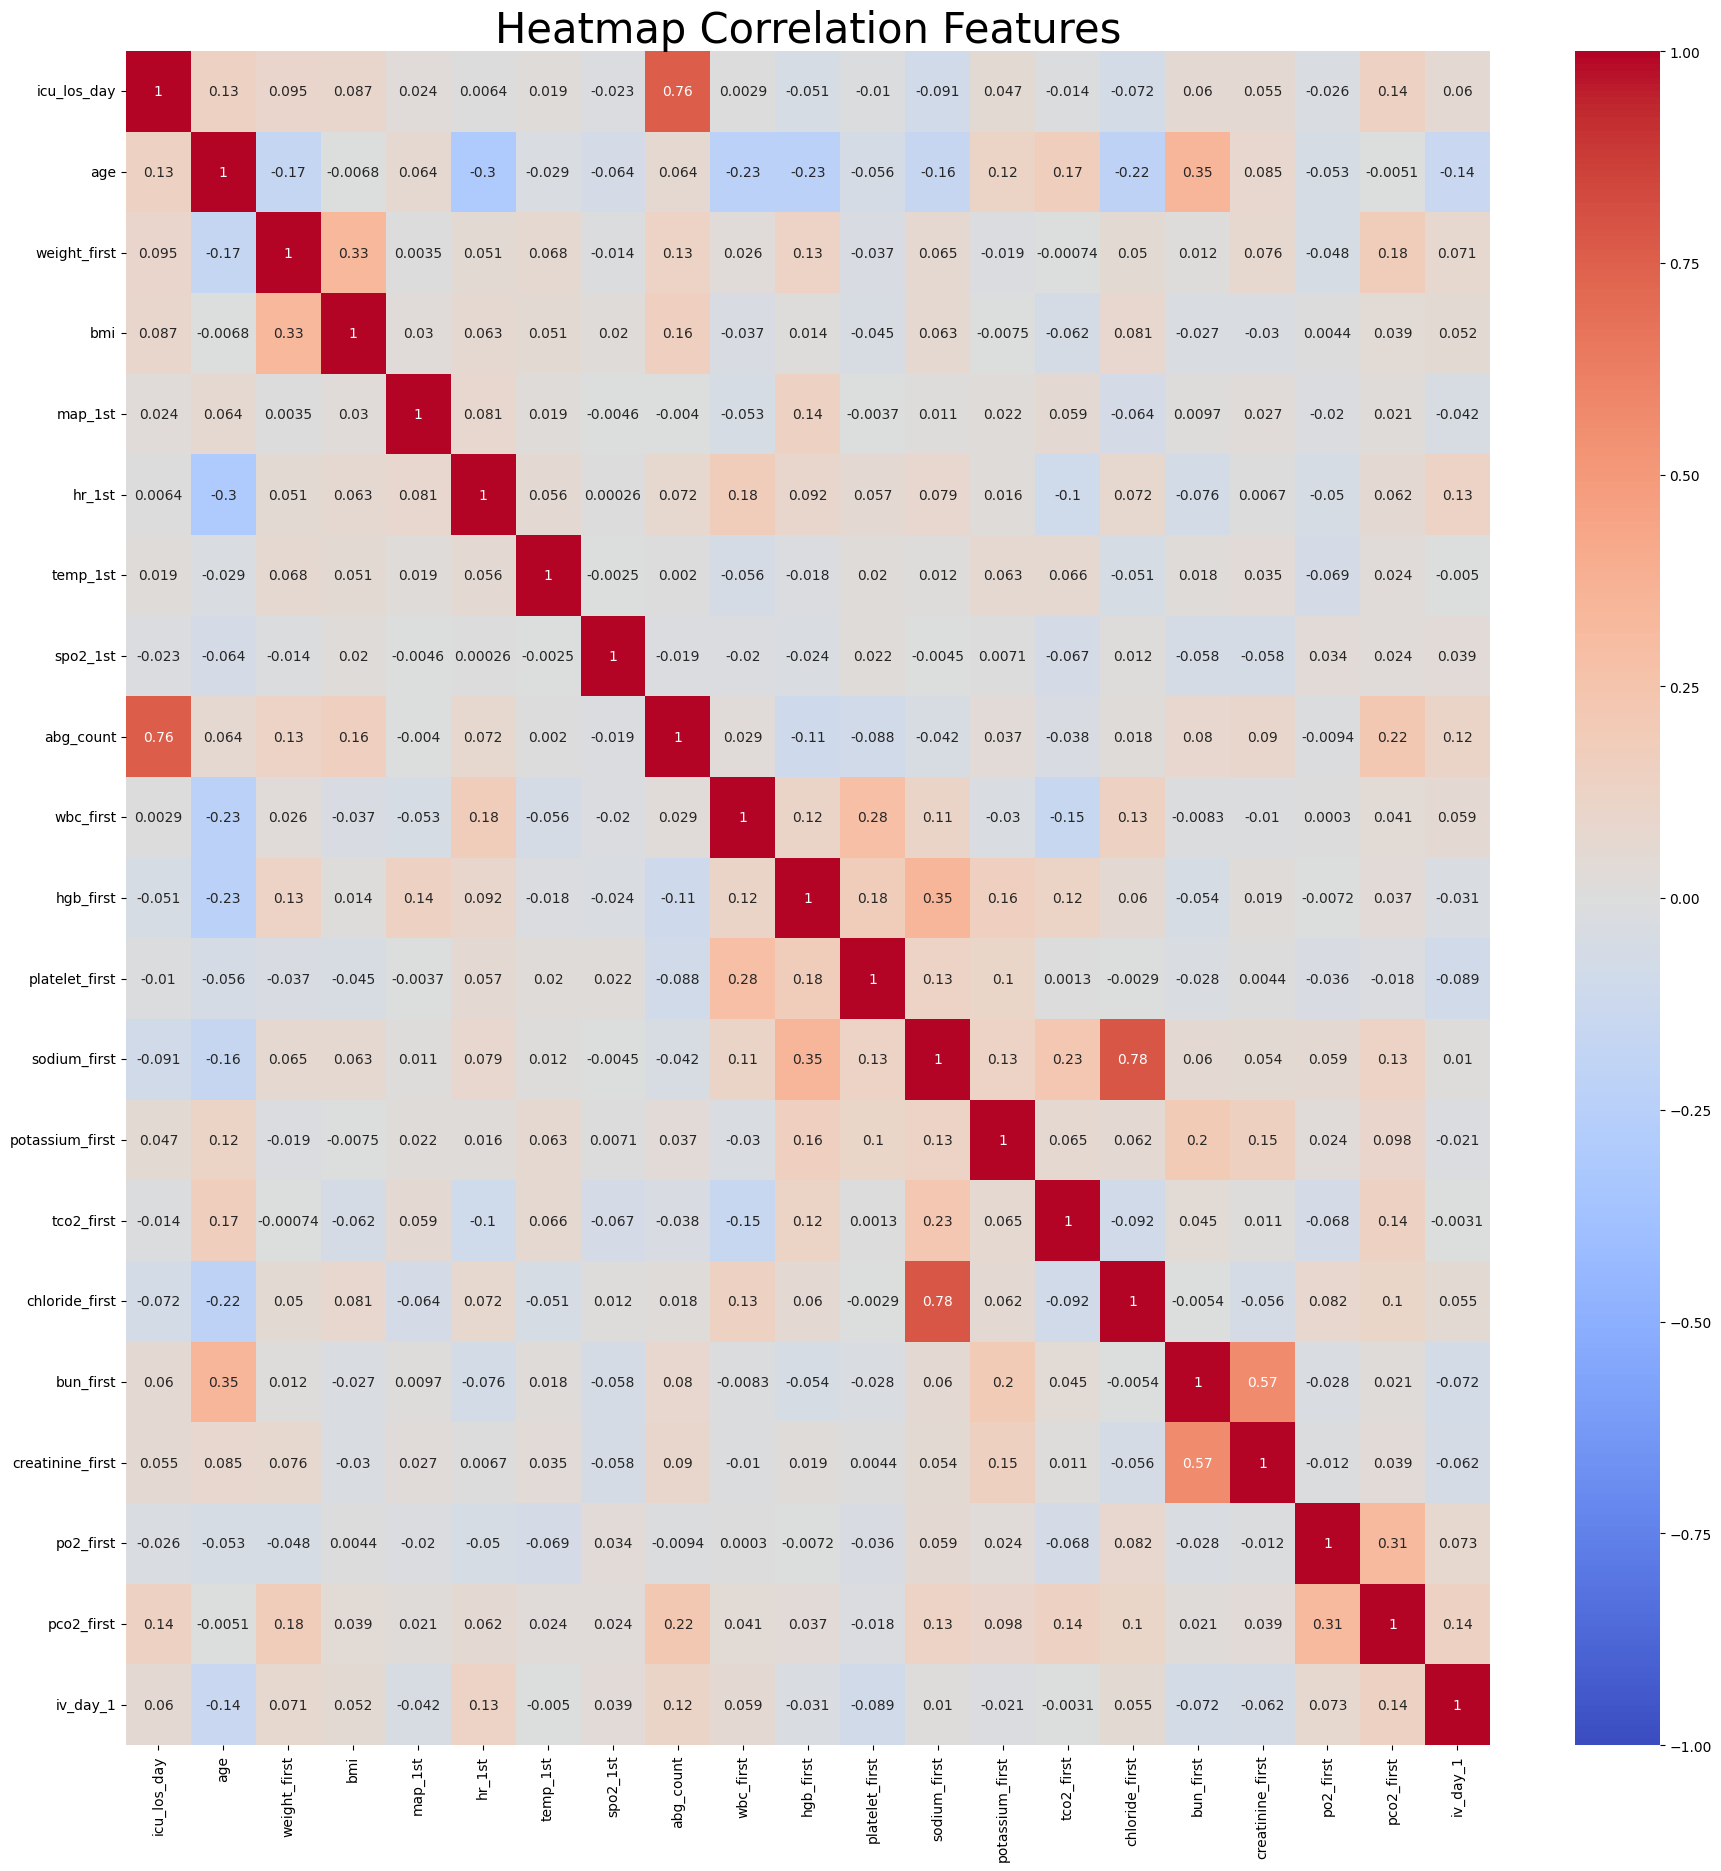

In [6]:
plt.figure(figsize=(22,22))
plt.title("Heatmap Correlation Features", fontsize=30)
heatmap = sns.heatmap(data=x.corr(), vmax=1, vmin=-1, annot=True, cmap="coolwarm")
plt.show()

### **Splitting the features**

In [7]:
# Separating the features in sets just to make an easy visualization.
first_features_set = features[0:6]
second_features_set = features[6:12]
third_features_set = features[12:18]
fourth_features_set = features[18:22]

In [8]:
print("First Features set:", first_features_set)
print("Second Features set:", second_features_set)
print("Third Features set:", third_features_set)
print("Fourth Features set:", fourth_features_set)

First Features set: ['icu_los_day', 'age', 'weight_first', 'bmi', 'map_1st', 'hr_1st']
Second Features set: ['temp_1st', 'spo2_1st', 'abg_count', 'wbc_first', 'hgb_first', 'platelet_first']
Third Features set: ['sodium_first', 'potassium_first', 'tco2_first', 'chloride_first', 'bun_first', 'creatinine_first']
Fourth Features set: ['po2_first', 'pco2_first', 'iv_day_1']


### **Analysing the features**

#### **Plotting the first features set**

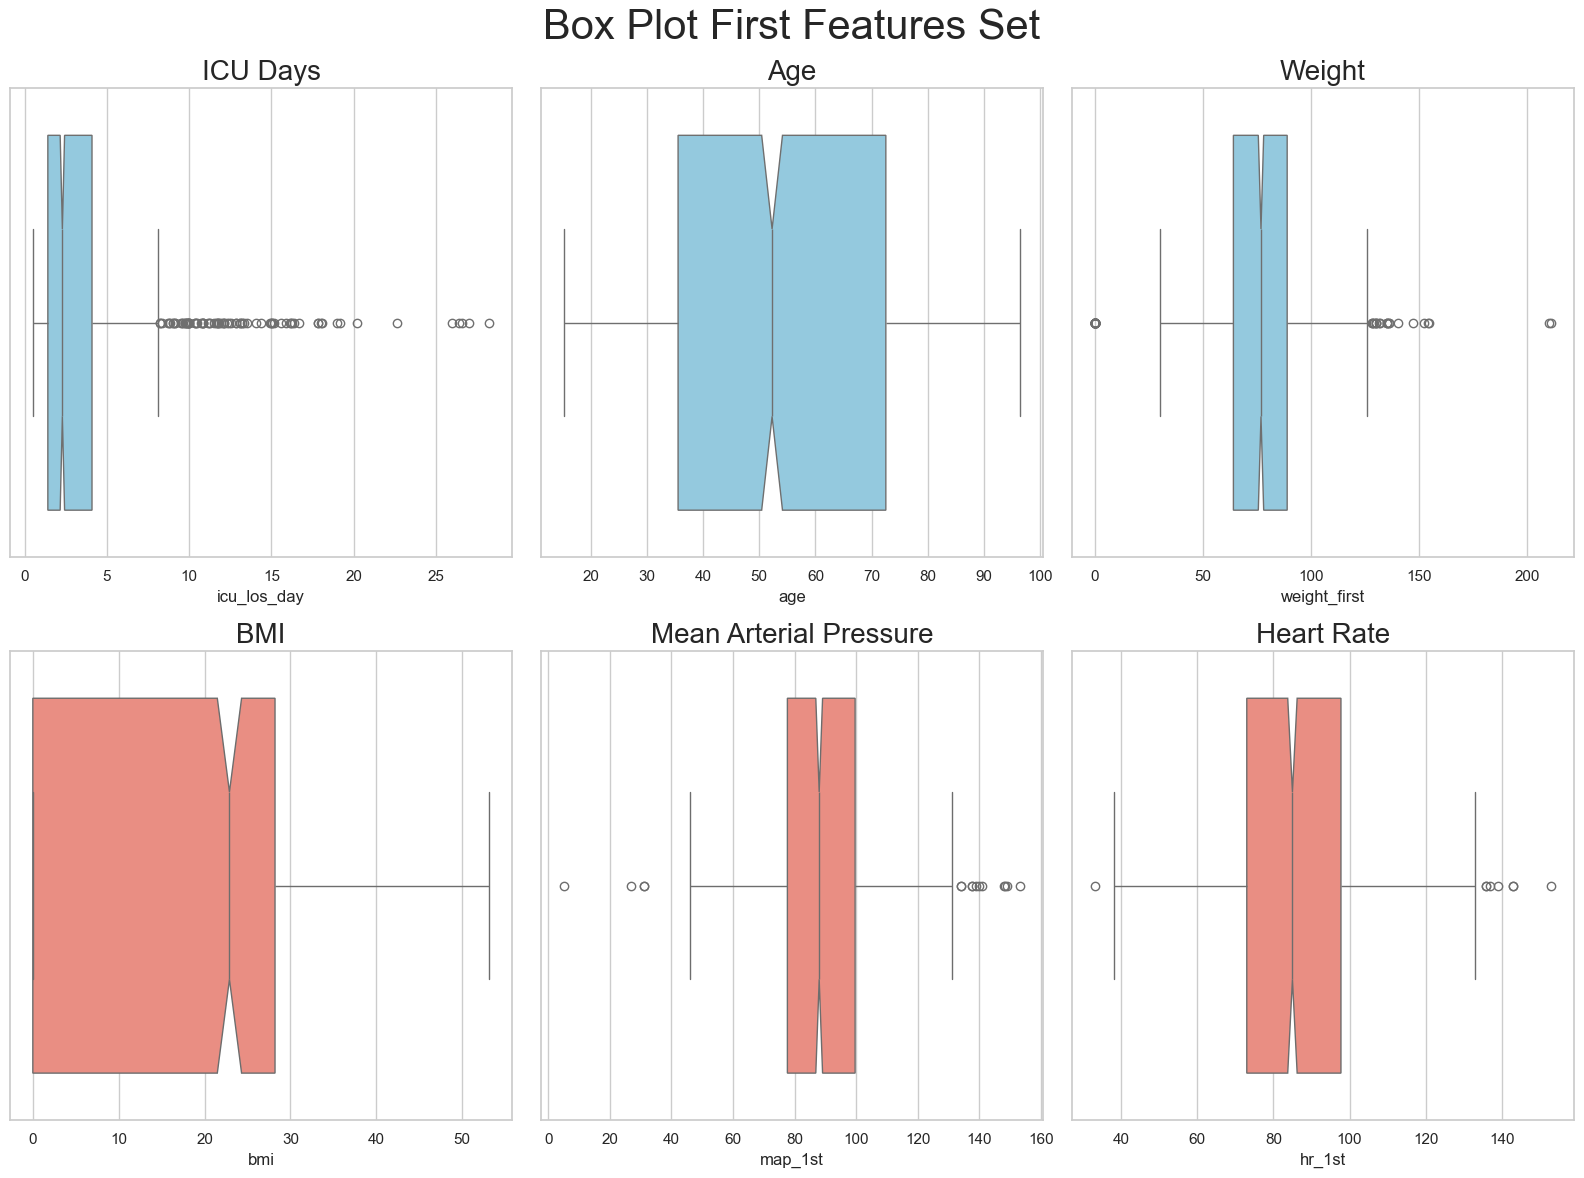

In [9]:
sns.set(style="whitegrid", palette="deep")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Box Plot First Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.boxplot(data=x, x=first_features_set[i], notch=True, color="skyblue", ax=axes[0,i])
    else:
        sns.boxplot(data=x, x=first_features_set[i], notch=True, color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("ICU Days", fontsize=20)
axes[0,1].set_title("Age", fontsize=20)
axes[0,2].set_title("Weight", fontsize=20)
axes[1,0].set_title("BMI", fontsize=20)
axes[1,1].set_title("Mean Arterial Pressure", fontsize=20)
axes[1,2].set_title("Heart Rate", fontsize=20)

plt.tight_layout()
plt.show()

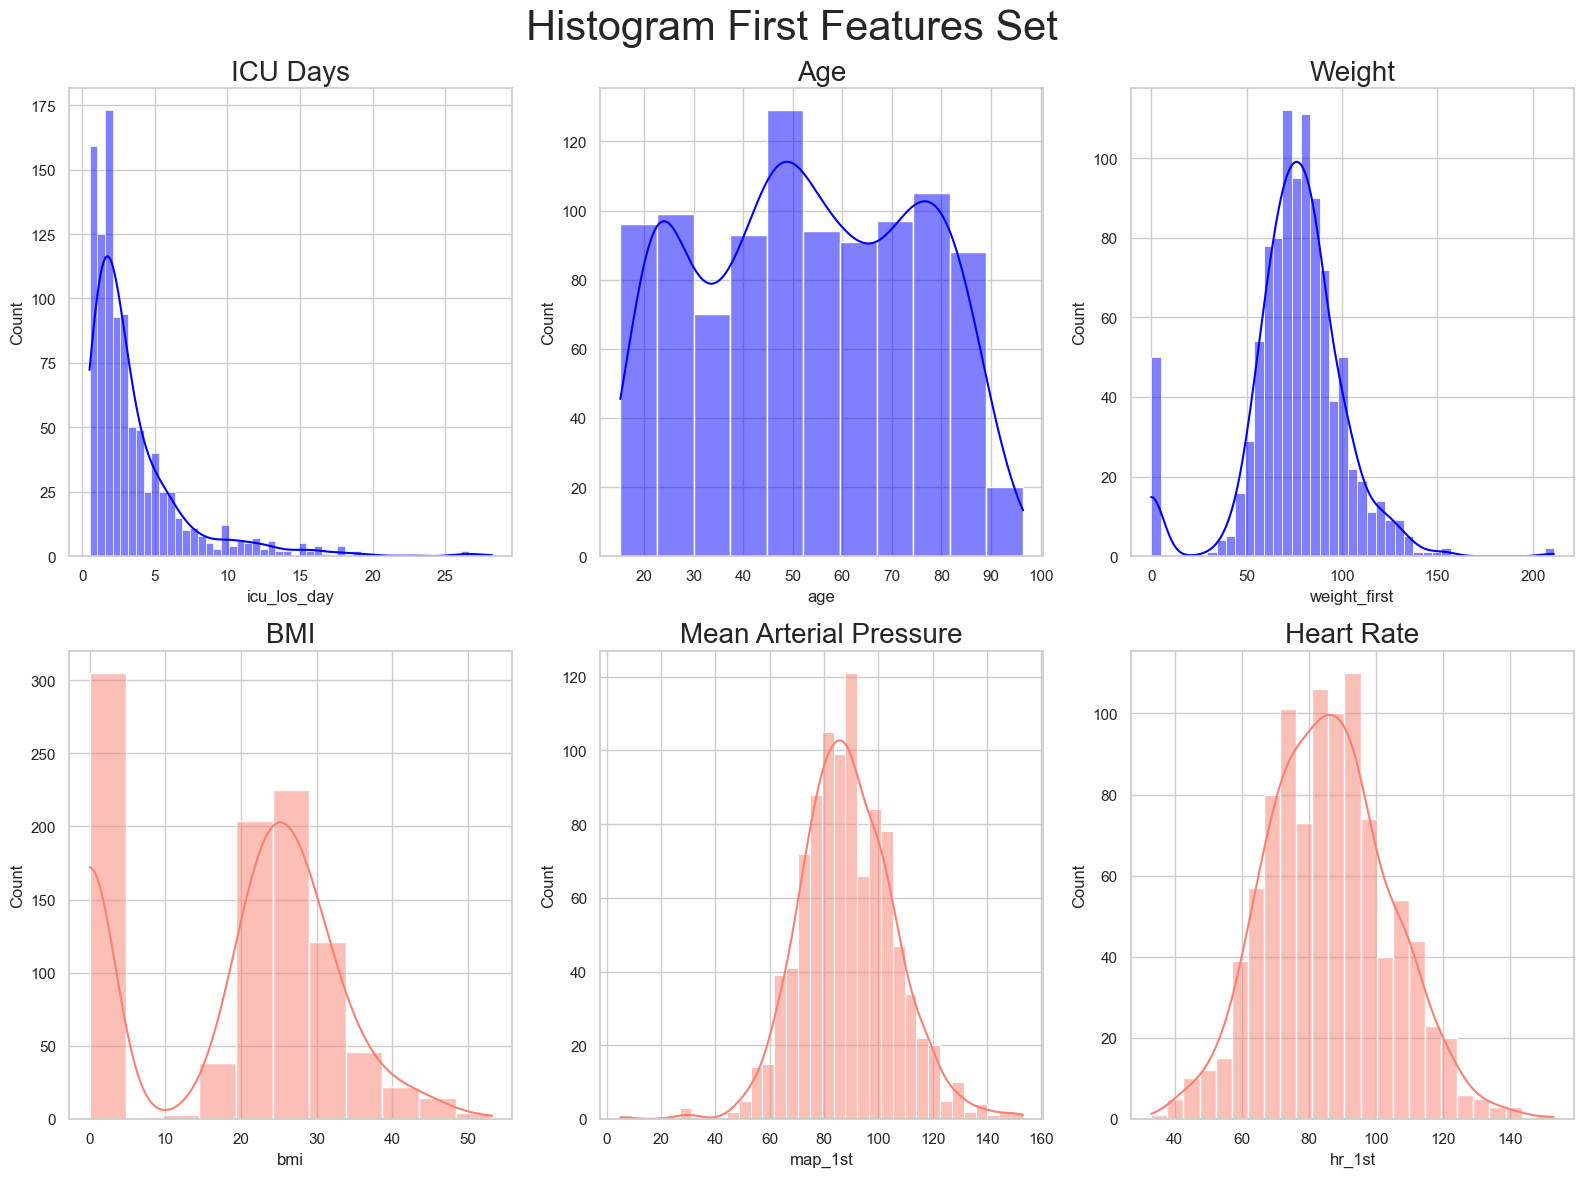

In [10]:
sns.set(style="whitegrid", palette="deep")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
fig.suptitle("Histogram First Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.histplot(x[first_features_set[i]], color="blue", kde=True, ax=axes[0,i], )
    else:
        sns.histplot(x[first_features_set[i]], color="salmon", kde=True, ax=axes[1,i-3])

axes[0,0].set_title("ICU Days", fontsize=20)
axes[0,1].set_title("Age", fontsize=20)
axes[0,2].set_title("Weight", fontsize=20)
axes[1,0].set_title("BMI", fontsize=20)
axes[1,1].set_title("Mean Arterial Pressure", fontsize=20)
axes[1,2].set_title("Heart Rate", fontsize=20)

plt.tight_layout()
plt.show()

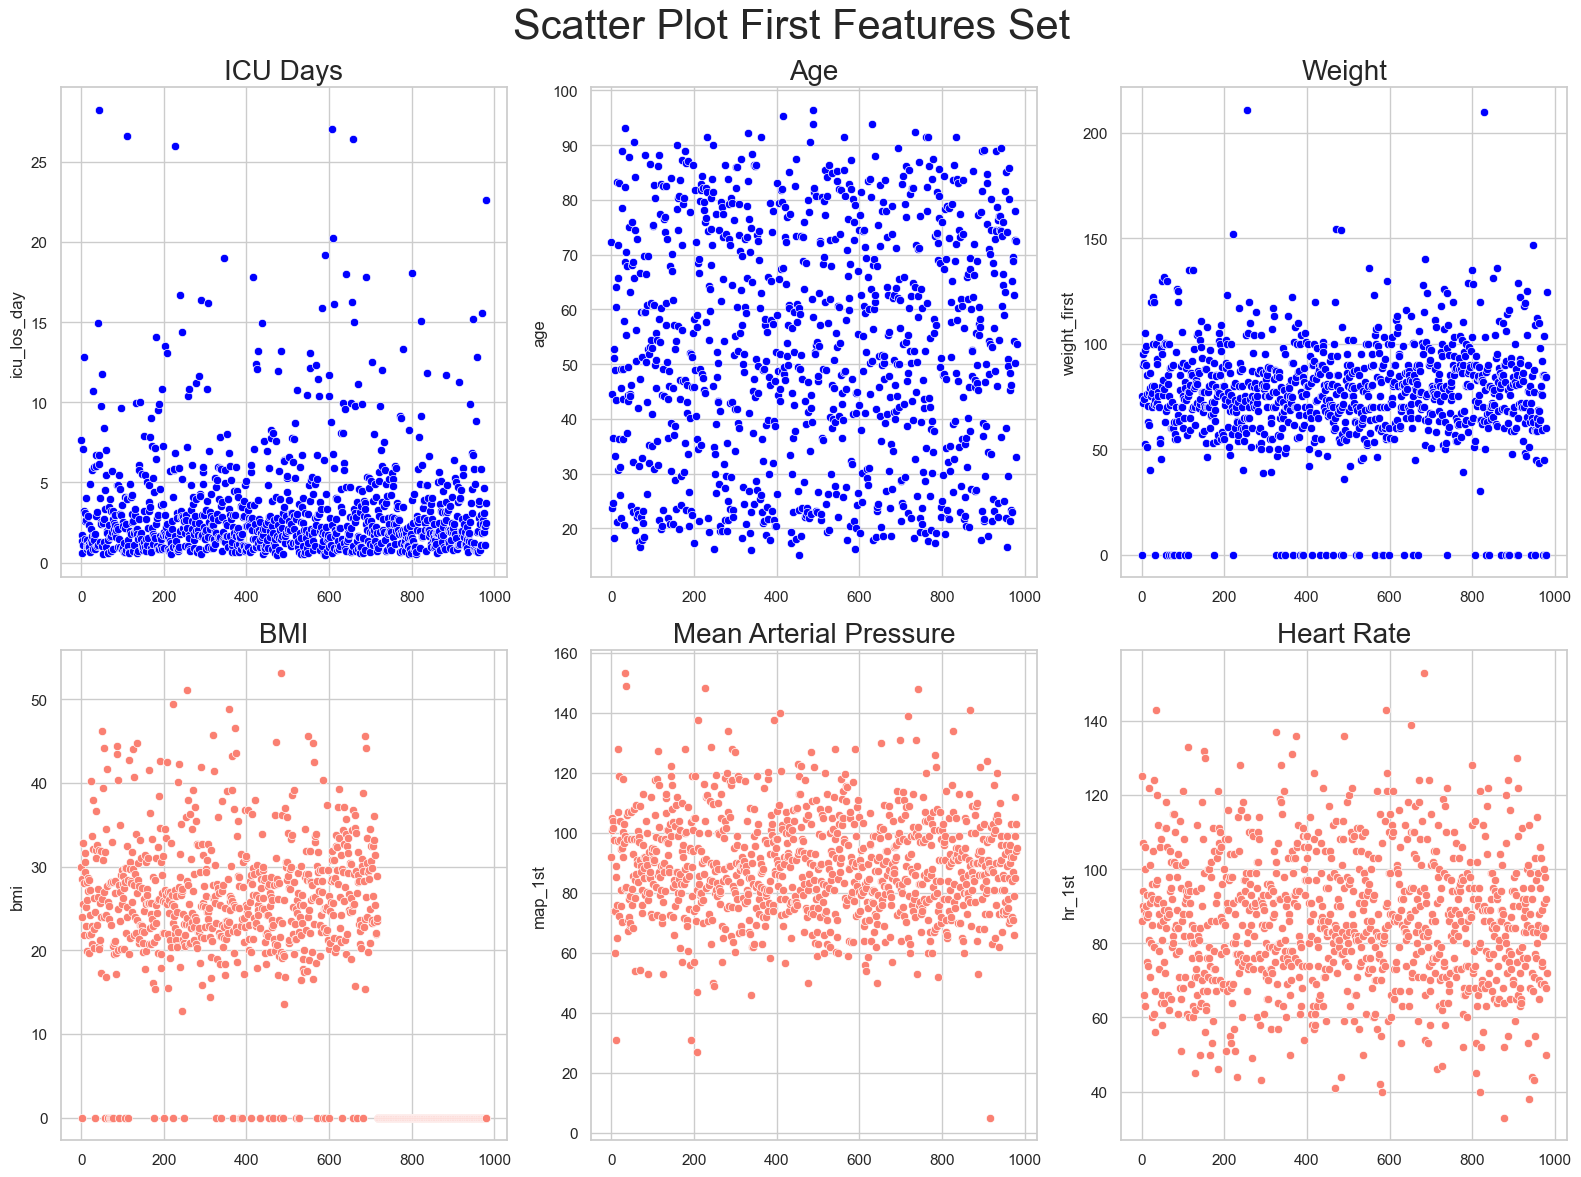

In [11]:
sns.set(style="whitegrid", palette="deep")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Scatter Plot First Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.scatterplot(x[first_features_set[i]], color="blue", ax=axes[0,i])
    else:
        sns.scatterplot(x[first_features_set[i]], color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("ICU Days", fontsize=20)
axes[0,1].set_title("Age", fontsize=20)
axes[0,2].set_title("Weight", fontsize=20)
axes[1,0].set_title("BMI", fontsize=20)
axes[1,1].set_title("Mean Arterial Pressure", fontsize=20)
axes[1,2].set_title("Heart Rate", fontsize=20)

plt.tight_layout()
plt.show()

#### **Plotting the second features set**

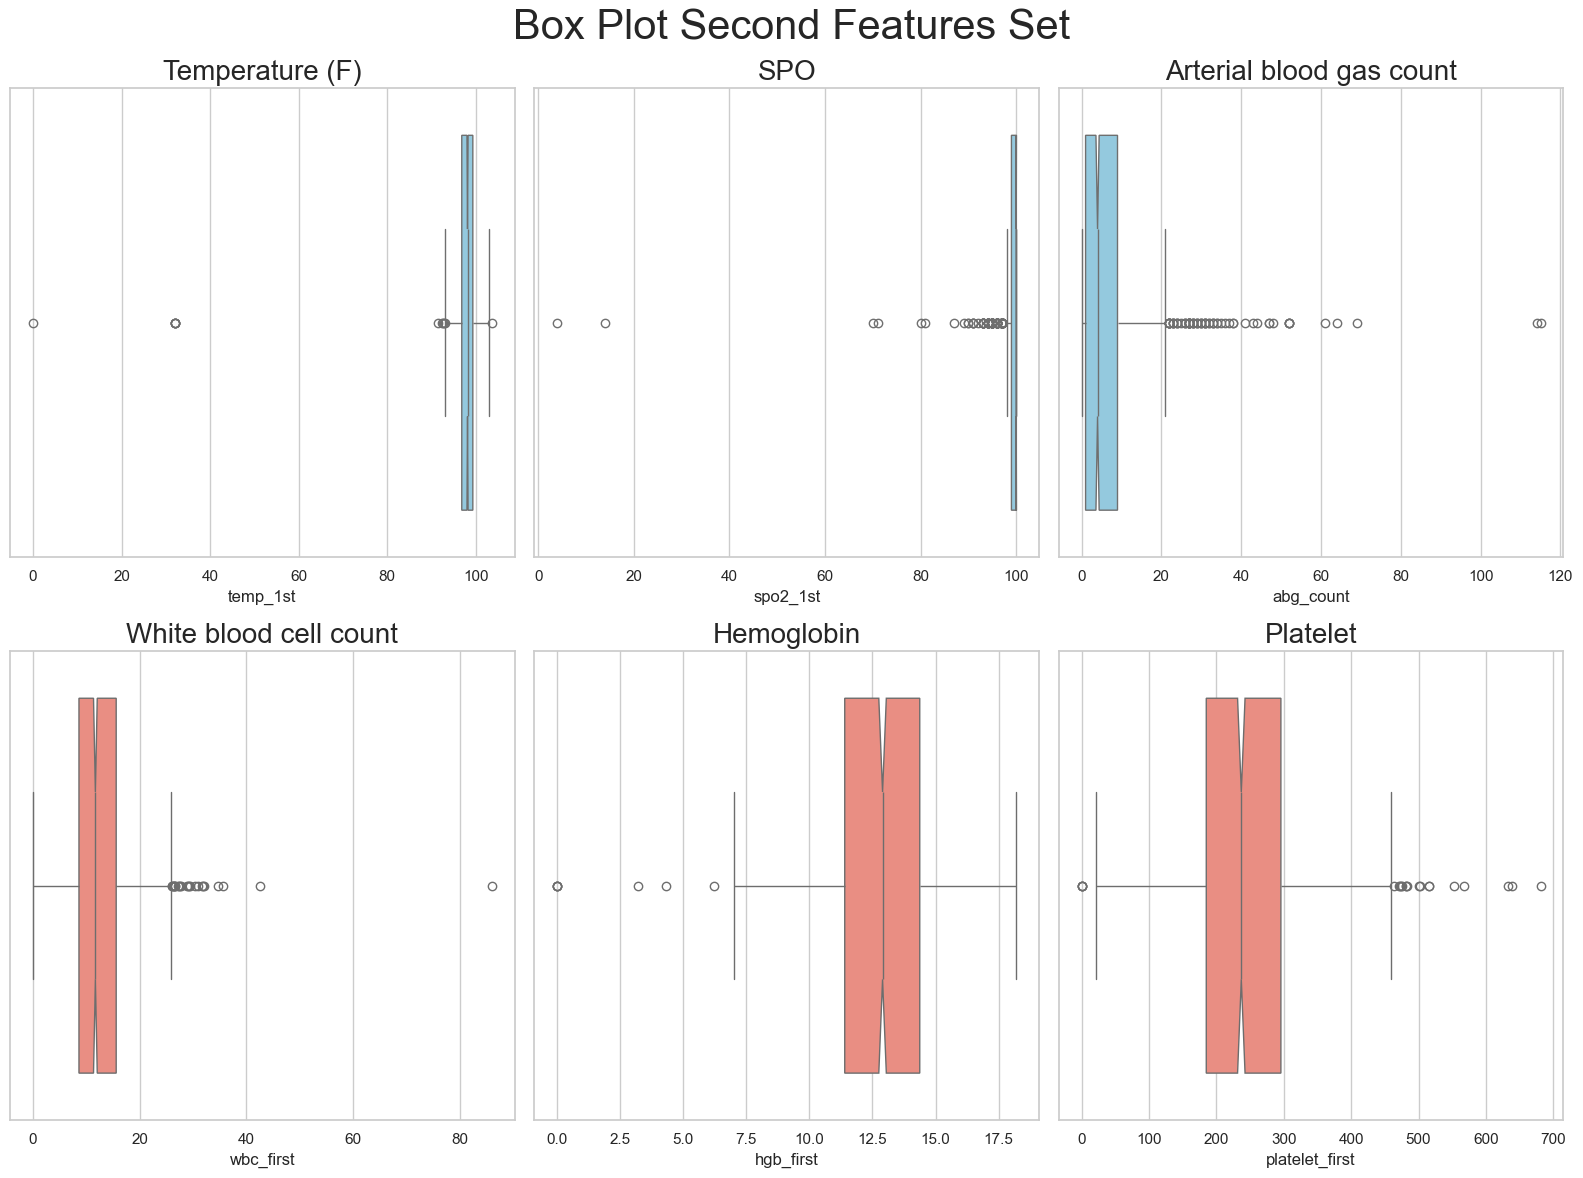

In [12]:
sns.set(style="whitegrid", palette="deep")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Box Plot Second Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.boxplot(data=x, x=second_features_set[i], notch=True, color="skyblue", ax=axes[0,i])
    else:
        sns.boxplot(data=x, x=second_features_set[i], notch=True, color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("Temperature (F)", fontsize=20)
axes[0,1].set_title("SPO", fontsize=20)
axes[0,2].set_title("Arterial blood gas count", fontsize=20)
axes[1,0].set_title("White blood cell count", fontsize=20)
axes[1,1].set_title("Hemoglobin", fontsize=20)
axes[1,2].set_title("Platelet", fontsize=20)

plt.tight_layout()
plt.show()

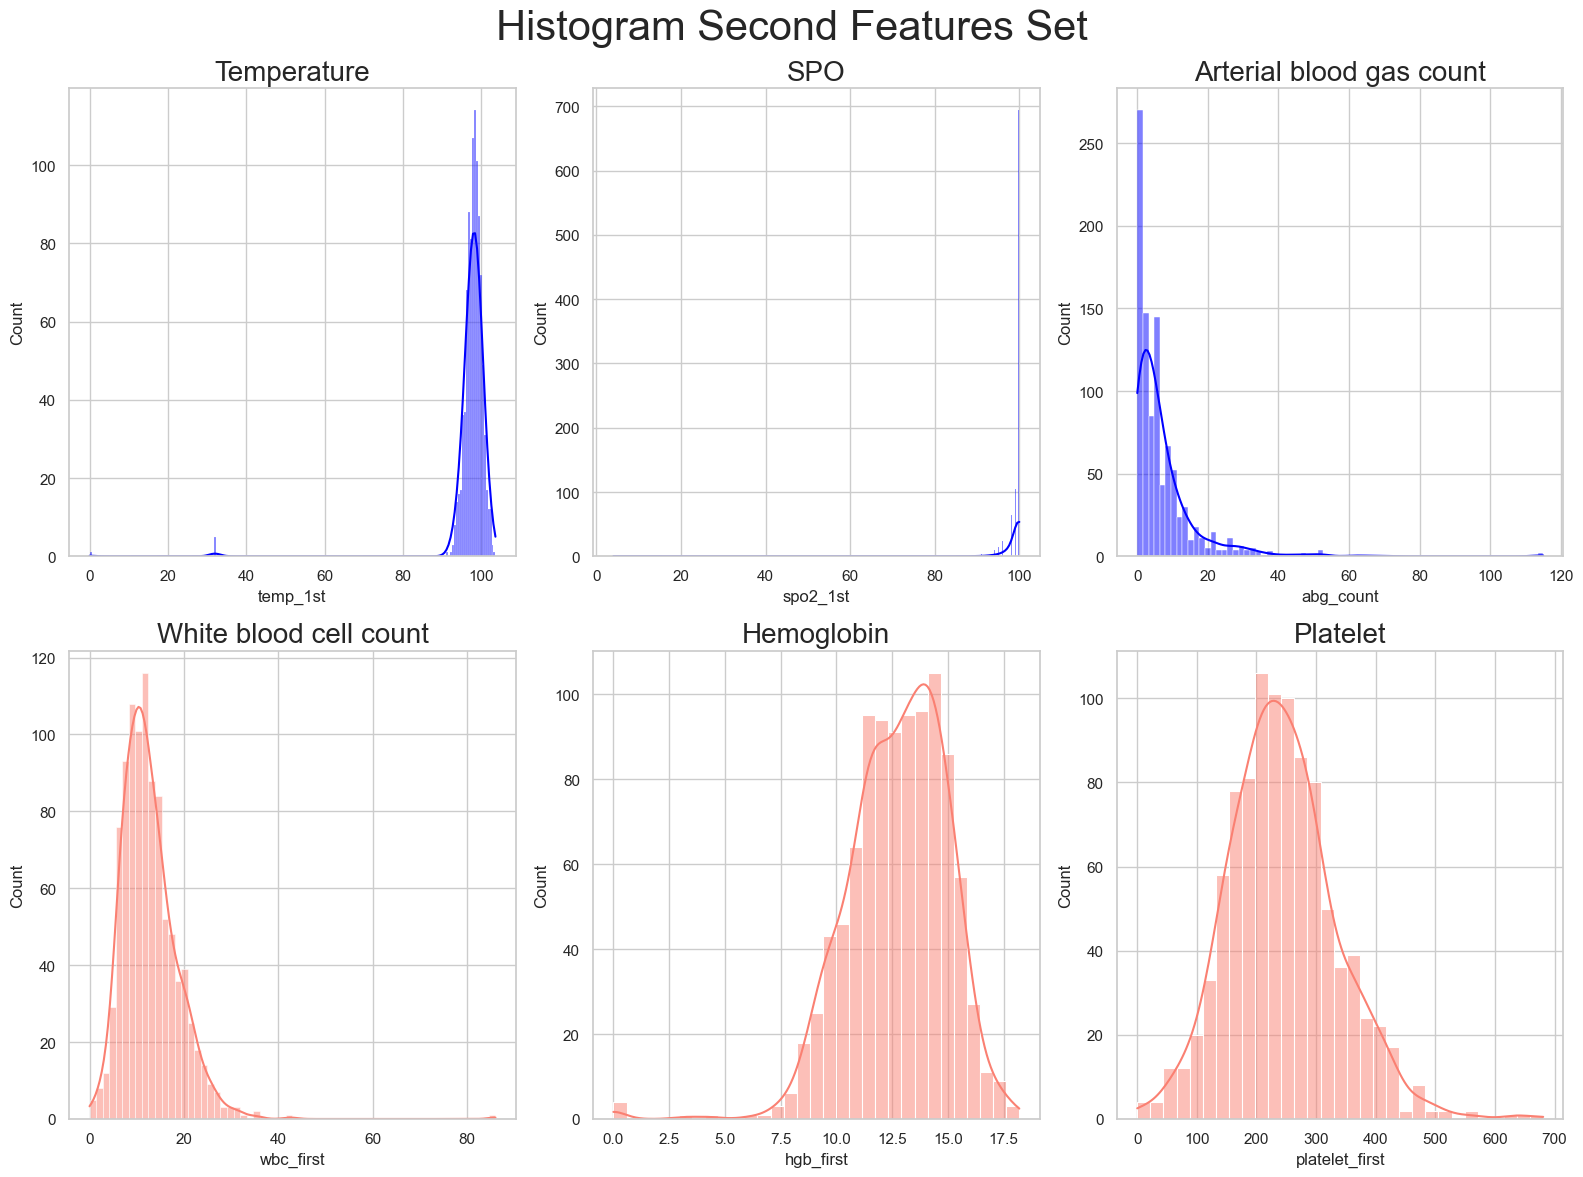

In [13]:
sns.set(style="whitegrid", palette="deep")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Histogram Second Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.histplot(x[second_features_set[i]], kde=True, color="blue", ax=axes[0,i])
    else:
        sns.histplot(x[second_features_set[i]], kde=True, color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("Temperature", fontsize=20)
axes[0,1].set_title("SPO", fontsize=20)
axes[0,2].set_title("Arterial blood gas count", fontsize=20)
axes[1,0].set_title("White blood cell count", fontsize=20)
axes[1,1].set_title("Hemoglobin", fontsize=20)
axes[1,2].set_title("Platelet", fontsize=20)

plt.tight_layout()
plt.show()

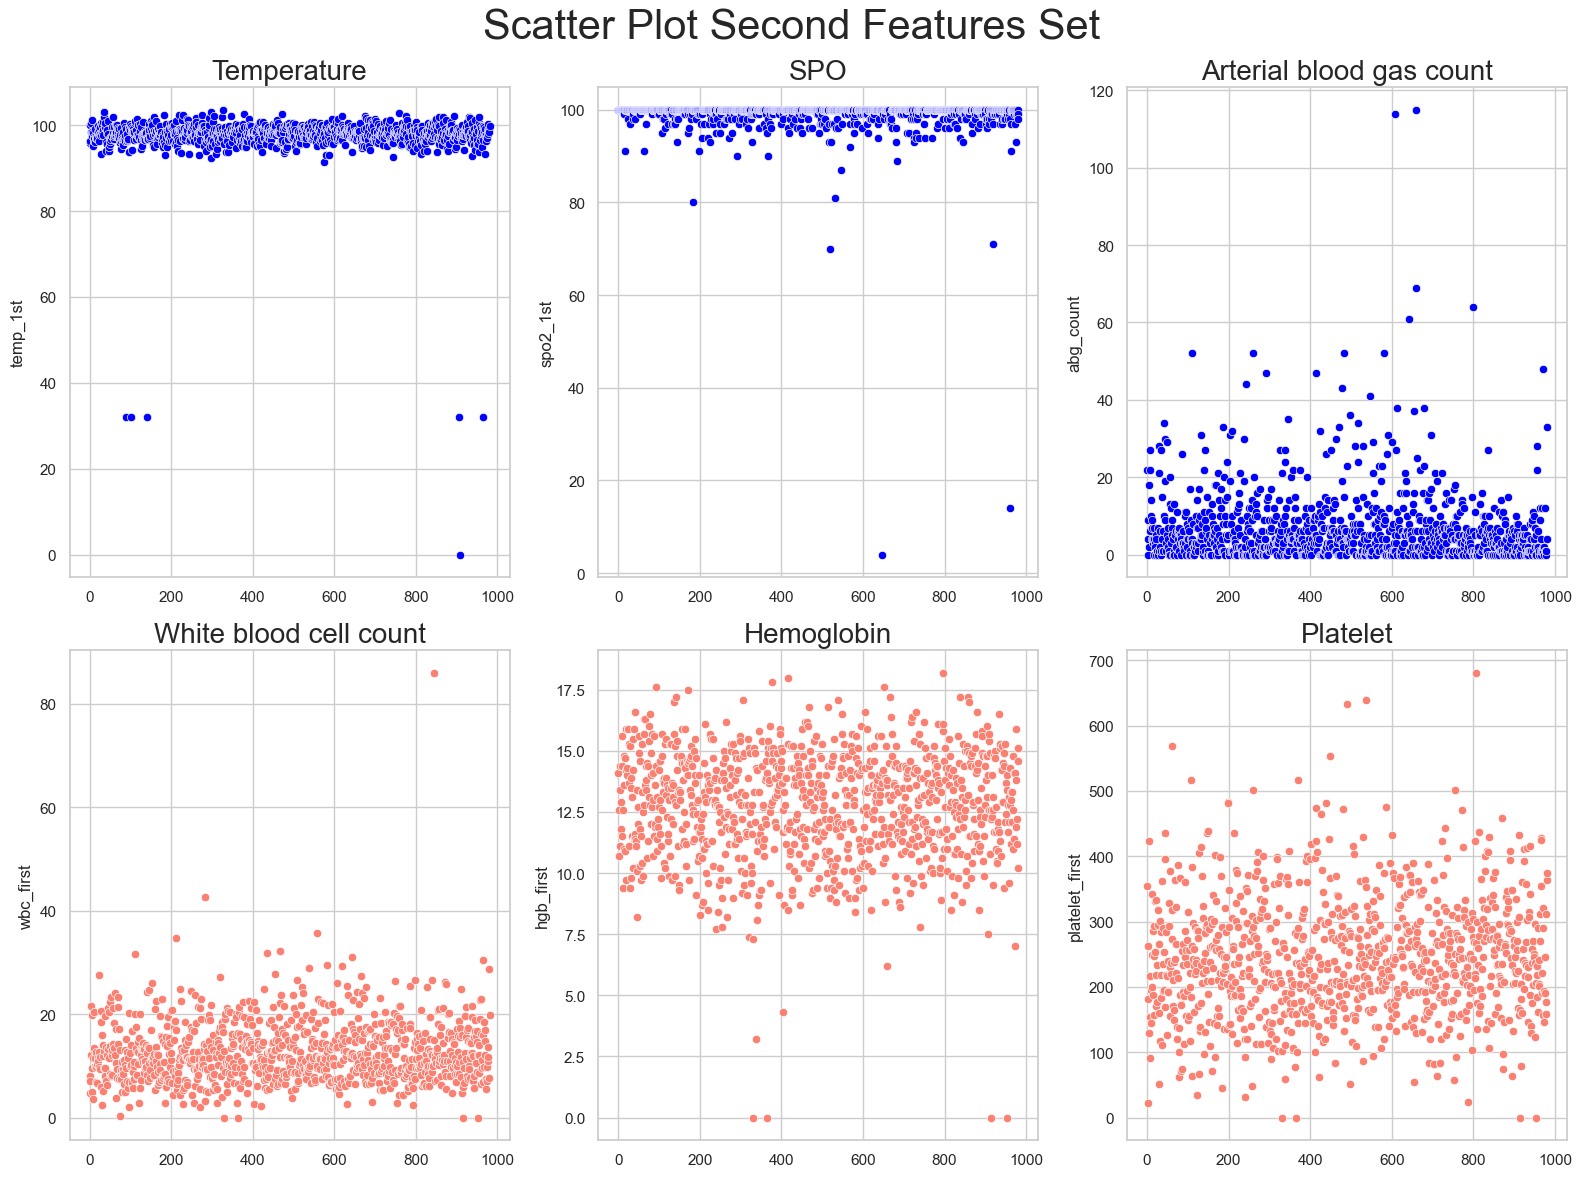

In [14]:
sns.set(style="whitegrid", palette="deep")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Scatter Plot Second Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.scatterplot(x[second_features_set[i]], color="blue", ax=axes[0,i])
    else:
        sns.scatterplot(x[second_features_set[i]], color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("Temperature", fontsize=20)
axes[0,1].set_title("SPO", fontsize=20)
axes[0,2].set_title("Arterial blood gas count", fontsize=20)
axes[1,0].set_title("White blood cell count", fontsize=20)
axes[1,1].set_title("Hemoglobin", fontsize=20)
axes[1,2].set_title("Platelet", fontsize=20)

plt.tight_layout()
plt.show()

#### **Plotting the third features set**

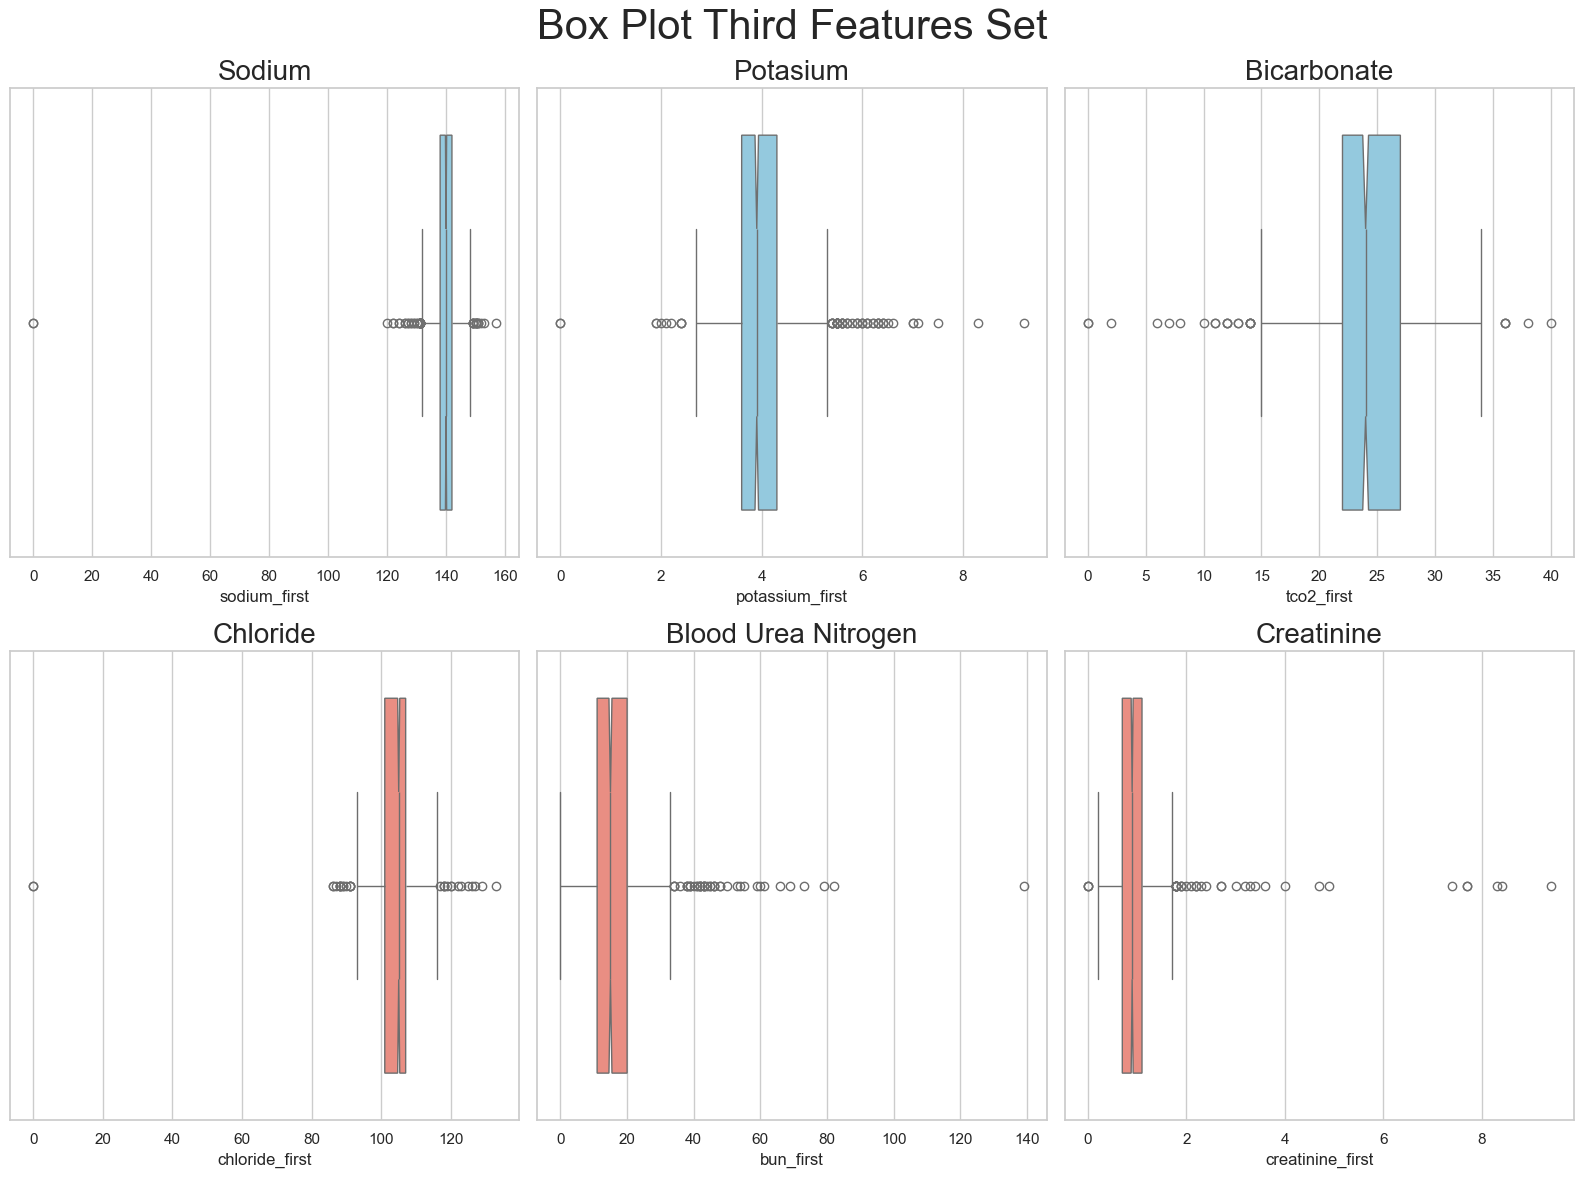

In [15]:
sns.set(style="whitegrid", palette="deep")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Box Plot Third Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.boxplot(data=x, x=third_features_set[i], notch=True, color="skyblue", ax=axes[0,i])
    else:
        sns.boxplot(data=x, x=third_features_set[i], notch=True, color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("Sodium", fontsize=20)
axes[0,1].set_title("Potasium", fontsize=20)
axes[0,2].set_title("Bicarbonate", fontsize=20)
axes[1,0].set_title("Chloride", fontsize=20)
axes[1,1].set_title("Blood Urea Nitrogen", fontsize=20)
axes[1,2].set_title("Creatinine", fontsize=20)

plt.tight_layout()
plt.show()

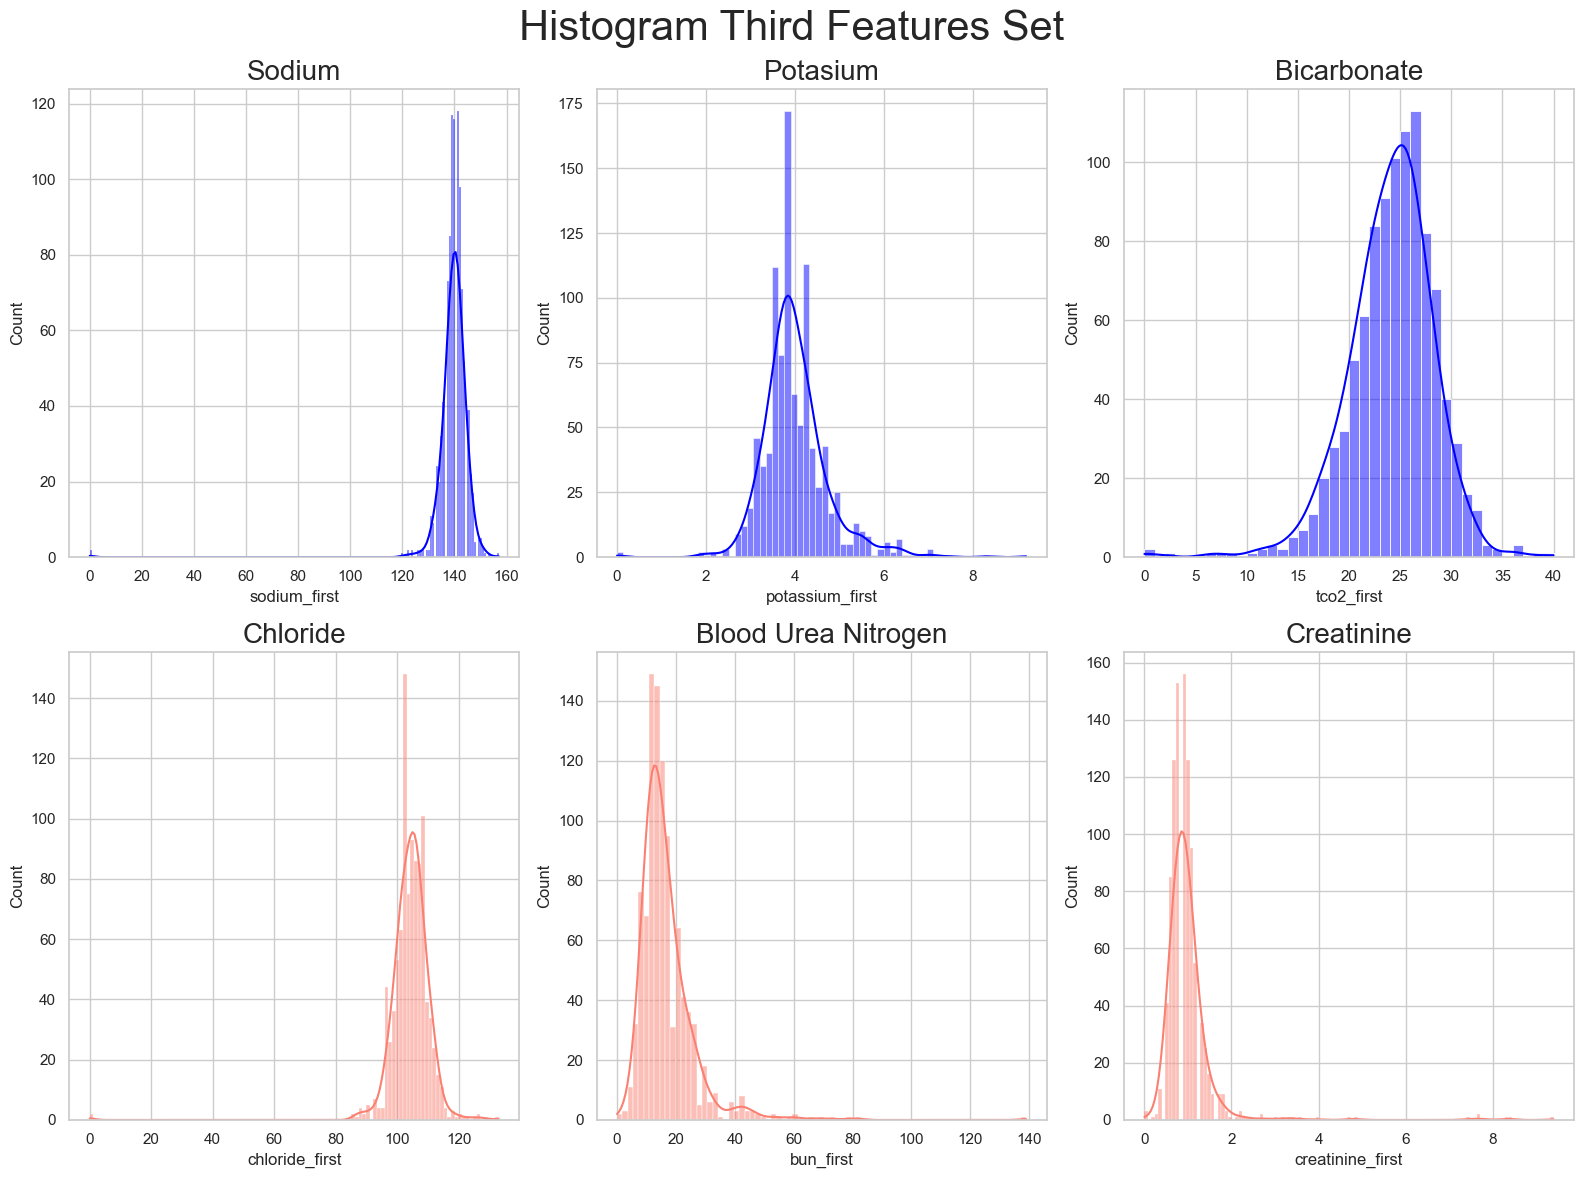

In [16]:
sns.set(style="whitegrid", palette="deep")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Histogram Third Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.histplot(x[third_features_set[i]], kde=True, color="blue", ax=axes[0,i])
    else:
        sns.histplot(x[third_features_set[i]], kde=True, color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("Sodium", fontsize=20)
axes[0,1].set_title("Potasium", fontsize=20)
axes[0,2].set_title("Bicarbonate", fontsize=20)
axes[1,0].set_title("Chloride", fontsize=20)
axes[1,1].set_title("Blood Urea Nitrogen", fontsize=20)
axes[1,2].set_title("Creatinine", fontsize=20)

plt.tight_layout()
plt.show()

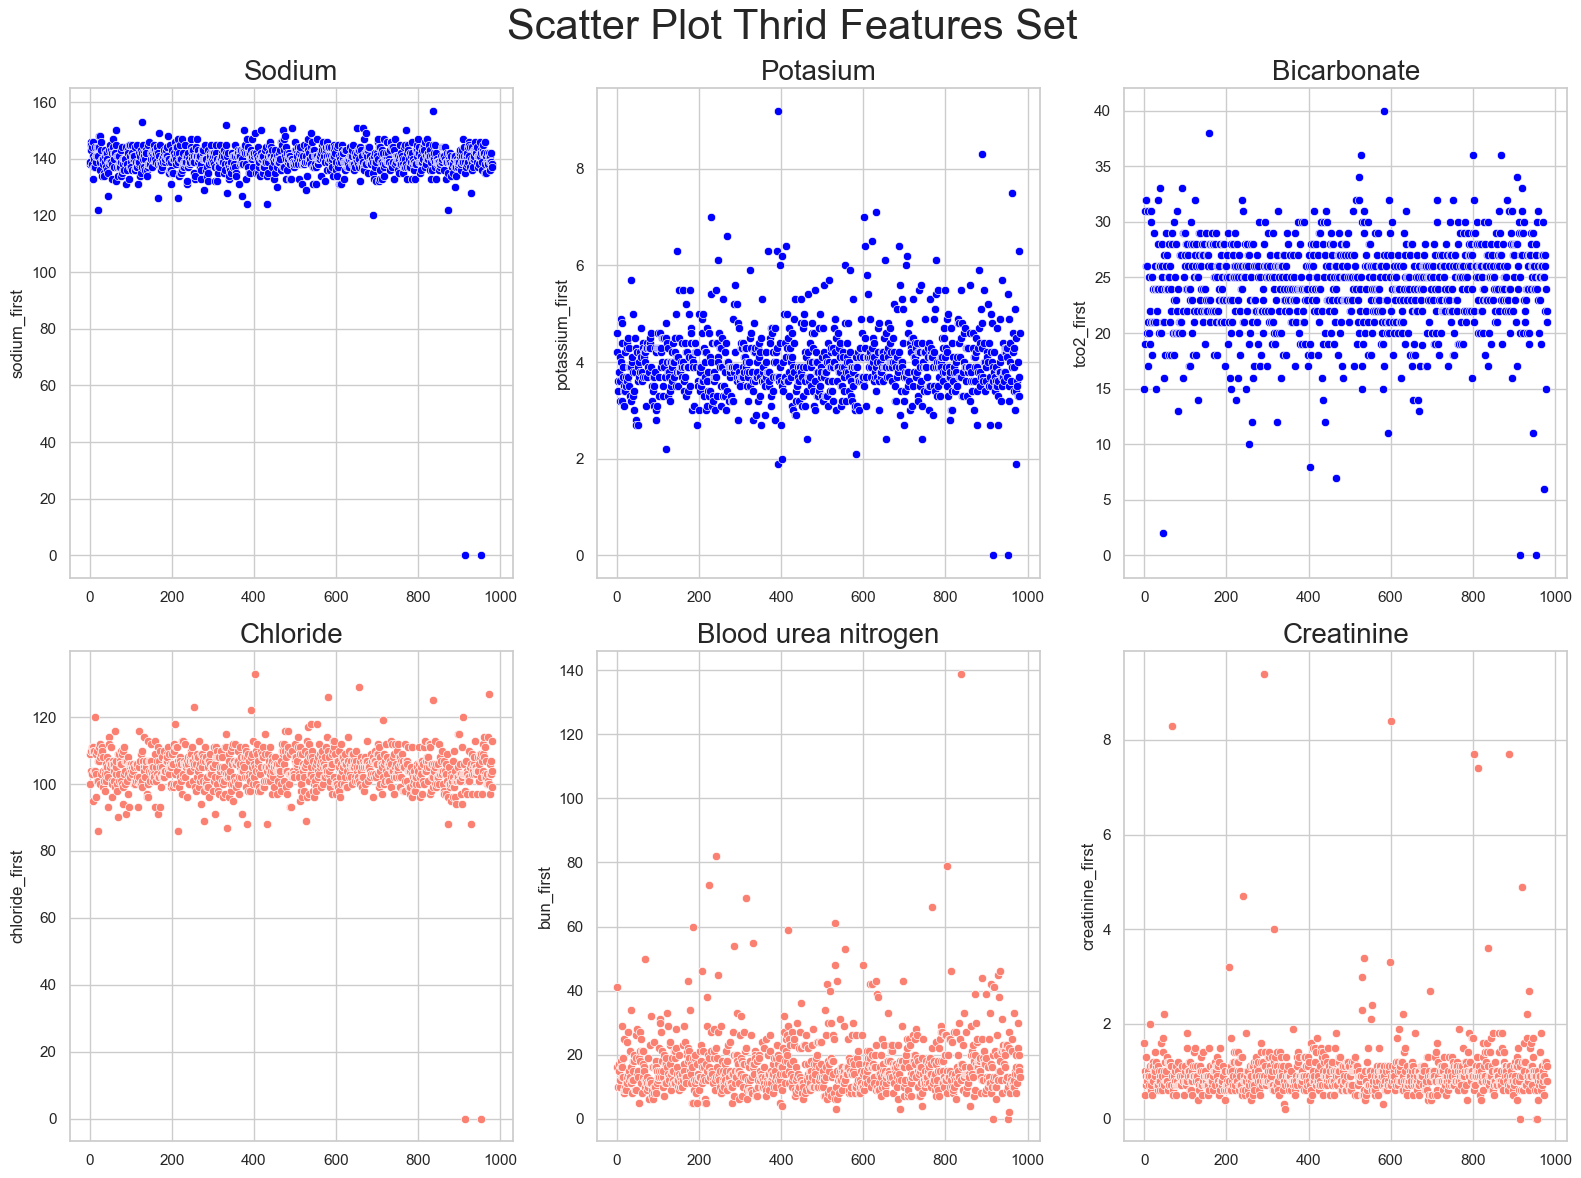

In [17]:
sns.set(style="whitegrid", palette="deep")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Scatter Plot Thrid Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.scatterplot(x[third_features_set[i]], color="blue", ax=axes[0,i])
    else:
        sns.scatterplot(x[third_features_set[i]], color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("Sodium", fontsize=20)
axes[0,1].set_title("Potasium", fontsize=20)
axes[0,2].set_title("Bicarbonate", fontsize=20)
axes[1,0].set_title("Chloride", fontsize=20)
axes[1,1].set_title("Blood urea nitrogen", fontsize=20)
axes[1,2].set_title("Creatinine", fontsize=20)

plt.tight_layout()
plt.show()

#### **Plotting Fourth Features Set** 

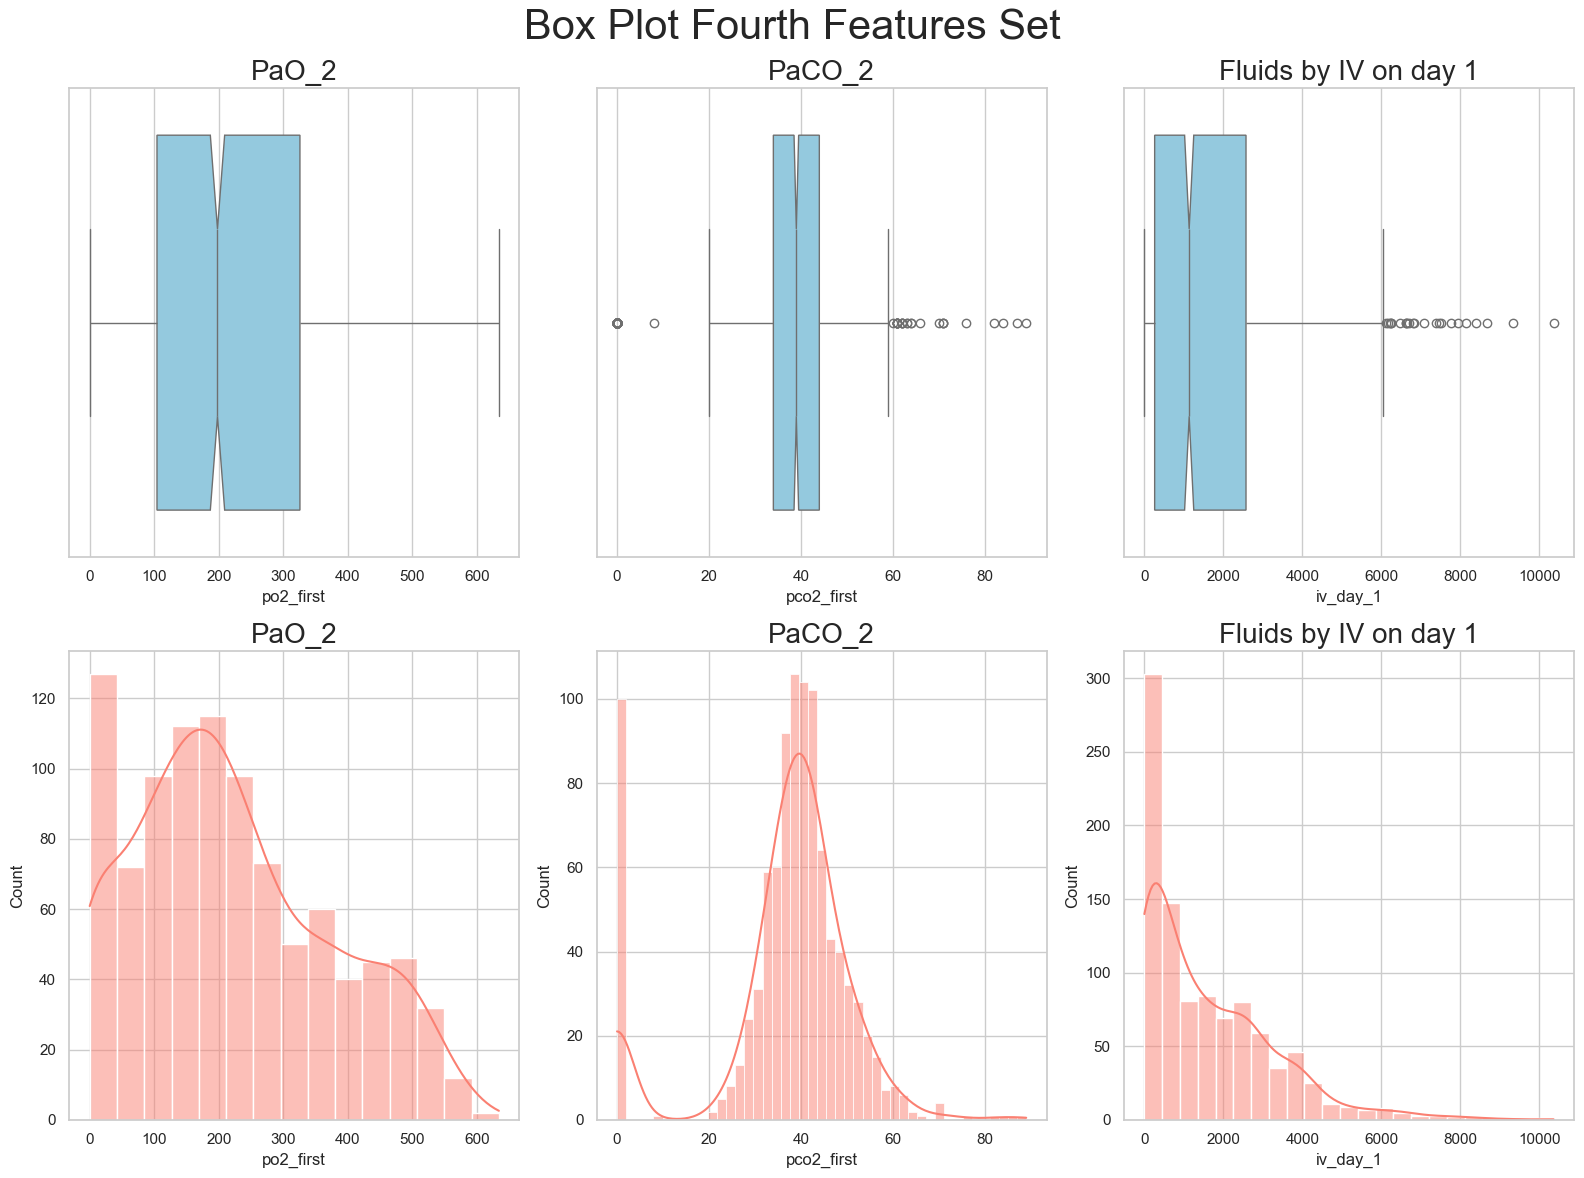

In [18]:
sns.set(style="whitegrid", palette="deep")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Box Plot Fourth Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.boxplot(data=x, x=fourth_features_set[i], notch=True, color="skyblue", ax=axes[0,i])
    else:
        sns.histplot(x[fourth_features_set[i-3]], kde=True, color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("PaO_2", fontsize=20)
axes[0,1].set_title("PaCO_2", fontsize=20)
axes[0,2].set_title("Fluids by IV on day 1", fontsize=20)
axes[1,0].set_title("PaO_2", fontsize=20)
axes[1,1].set_title("PaCO_2", fontsize=20)
axes[1,2].set_title("Fluids by IV on day 1", fontsize=20)

plt.tight_layout()
plt.show()

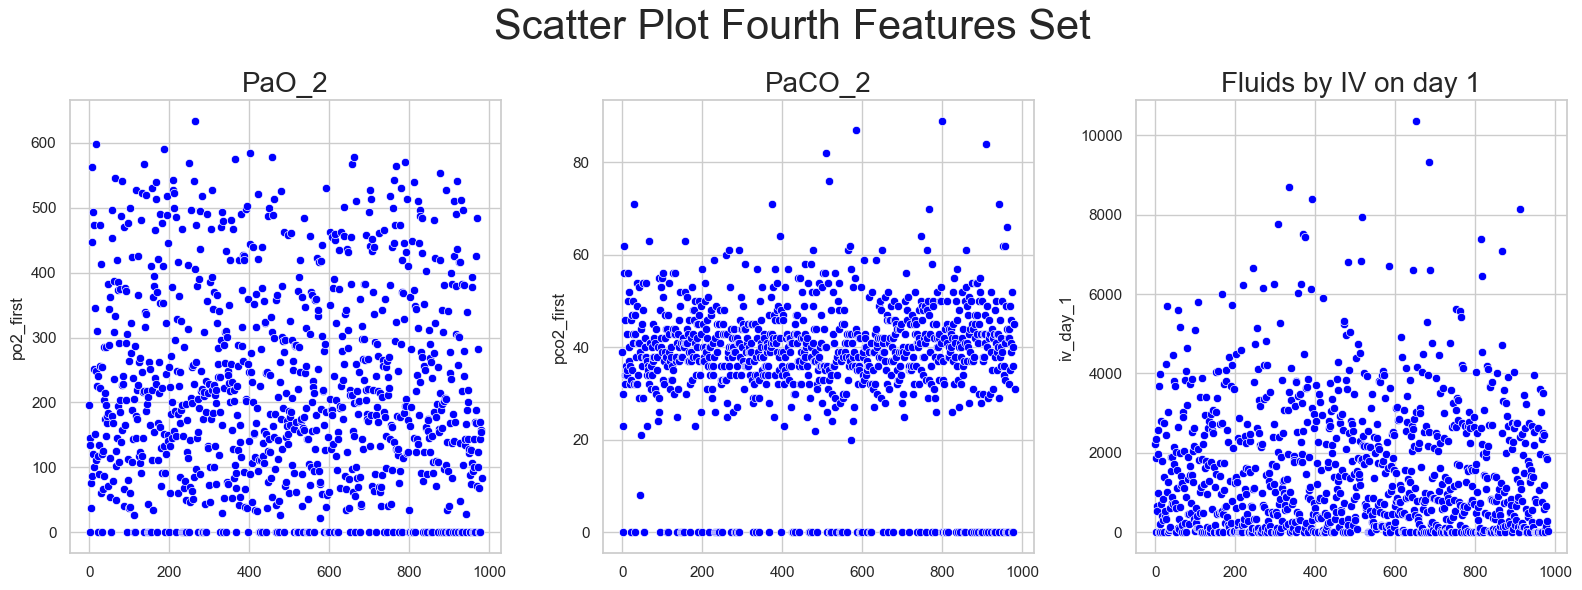

In [19]:
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
fig.suptitle("Scatter Plot Fourth Features Set", fontsize=30)
for i in range(0,3):
    sns.scatterplot(x[fourth_features_set[i]], color="blue", ax=axes[i])

axes[0].set_title("PaO_2", fontsize=20)
axes[1].set_title("PaCO_2", fontsize=20)
axes[2].set_title("Fluids by IV on day 1", fontsize=20)

plt.tight_layout()
plt.show()

## **Analysing Data**

### **Top 5 or bottom 5 records**

In [20]:
x.head()

icu_los_day       age  weight_first        bmi  map_1st  hr_1st  \
0         7.63  72.36841          75.0  29.912791   92.000      86   
1         0.58  44.49191           0.0   0.000000  101.000     125   
2         1.75  23.74217          95.2  28.464563  105.000     107   
3         1.38  36.54657          72.0  23.982402  104.000      90   
4         7.06  24.64717          90.0  25.474850  101.667      94   

     temp_1st  spo2_1st  abg_count  wbc_first  ...  platelet_first  \
0   95.900002       100         22        8.1  ...             354   
1  100.099998       100          4        7.1  ...             262   
2   96.300003       100          9        4.8  ...              22   
3   98.400002       100          0       12.1  ...             182   
4  100.400002       100         18       21.6  ...             130   

   sodium_first  potassium_first  tco2_first  chloride_first  bun_first  \
0           138              4.6        15.0             109         41   
1           139              4.2        31.0             100         16   
2           146              3.4        19.0             110         10   
3           145              3.6        26.0             110         10   
4           143              3.8        32.0             104         17   

   creatinine_first  po2_first  pco2_first     iv_day_1  
0               1.6        196          39  2230.875000  
1               0.5        146          23     0.000000  
2               1.0        134          30  2358.244141  
3               0.7          0           0  1877.560059  
4               1.3         38          62   648.599976  

[5 rows x 21 columns]

In [21]:
x.tail()

icu_los_day       age  weight_first  bmi  map_1st  hr_1st    temp_1st  \
977         2.27  50.15744           0.0  0.0    112.0      98  100.300003   
978         1.08  77.96057           0.0  0.0     85.0      68   98.000000   
979         2.45  33.04643          84.0  0.0    103.0      92   98.800003   
980         3.70  72.44020          60.0  0.0     94.0      50   98.400002   
981        22.63  53.74423         124.4  0.0     95.0      72   99.900002   

     spo2_1st  abg_count  wbc_first  ...  platelet_first  sodium_first  \
977        99          1       11.7  ...             159           139   
978       100          0       13.7  ...             312           142   
979       100          1       28.8  ...             177           138   
980        99          4        7.6  ...             363           138   
981        98         33       19.9  ...             374           137   

     potassium_first  tco2_first  chloride_first  bun_first  creatinine_first  \
977              4.0        22.0             103         22               1.2   
978              3.3        24.0             107         16               0.8   
979              3.7        15.0             113         15               1.2   
980              6.3        22.0             104         20               0.8   
981              4.6        21.0              99         13               1.1   

     po2_first  pco2_first     iv_day_1  
977        144          36   650.000000  
978          0           0   150.000000  
979        158          45  1836.659912  
980        154          45   289.950012  
981         84          31    21.770000  

[5 rows x 21 columns]

### **Statistical description**

In [22]:
x.describe().T

count         mean          std       min         25%  \
icu_los_day       982.0     3.534155     3.669347   0.50000    1.412500   
age               982.0    53.144155    21.407871  15.19046   35.547540   
weight_first      982.0    75.667546    26.059355   0.00000   64.150000   
bmi               982.0    18.620344    13.557910   0.00000    0.000000   
map_1st           982.0    88.792940    17.188050   5.00000   77.666702   
hr_1st            982.0    85.759674    18.256784  33.00000   73.000000   
temp_1st          982.0    97.580957     5.940972   0.00000   96.800003   
spo2_1st          982.0    98.947047     4.653021   4.00000   99.000000   
abg_count         982.0     7.133401    10.039551   0.00000    1.000000   
wbc_first         982.0    12.707963     6.078140   0.00000    8.625000   
hgb_first         982.0    12.744603     2.231337   0.00000   11.400000   
platelet_first    982.0   244.015275    91.448301   0.00000  185.000000   
sodium_first      982.0   139.598778     7.467355   0.00000  138.000000   
potassium_first   982.0     4.000611     0.746135   0.00000    3.600000   
tco2_first        982.0    24.018228     4.205075   0.00000   22.000000   
chloride_first    982.0   104.328921     7.021357   0.00000  101.000000   
bun_first         982.0    16.809572     9.826600   0.00000   11.000000   
creatinine_first  982.0     0.996741     0.693166   0.00000    0.700000   
po2_first         982.0   221.572301   153.155829   0.00000  104.250000   
pco2_first        982.0    36.917515    14.891737   0.00000   34.000000   
iv_day_1          982.0  1624.942100  1654.865304   0.00000  260.329155   

                          50%          75%           max  
icu_los_day          2.295000     4.095000     28.240000  
age                 52.277470    72.525320     96.454240  
weight_first        76.900000    89.000000    211.000000  
bmi                 22.898715    28.206258     53.174533  
map_1st             88.000000    99.666702    153.332993  
hr_1st              85.000000    97.750000    153.000000  
temp_1st            98.099998    99.300003    103.599998  
spo2_1st           100.000000   100.000000    100.000000  
abg_count            4.000000     9.000000    115.000000  
wbc_first           11.700000    15.600000     86.000000  
hgb_first           12.900000    14.375000     18.200000  
platelet_first     237.000000   295.750000    681.000000  
sodium_first       140.000000   142.000000    157.000000  
potassium_first      3.900000     4.300000      9.200000  
tco2_first          24.000000    27.000000     40.000000  
chloride_first     105.000000   107.000000    133.000000  
bun_first           15.000000    20.000000    139.000000  
creatinine_first     0.900000     1.100000      9.400000  
po2_first          198.000000   325.750000    634.000000  
pco2_first          39.000000    44.000000     89.000000  
iv_day_1          1134.629944  2573.405883  10360.624020

### **Getting the columns and data types**

In [23]:
x.columns

Index(['icu_los_day', 'age', 'weight_first', 'bmi', 'map_1st', 'hr_1st',
       'temp_1st', 'spo2_1st', 'abg_count', 'wbc_first', 'hgb_first',
       'platelet_first', 'sodium_first', 'potassium_first', 'tco2_first',
       'chloride_first', 'bun_first', 'creatinine_first', 'po2_first',
       'pco2_first', 'iv_day_1'],
      dtype='object')

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   icu_los_day       982 non-null    float64
 1   age               982 non-null    float64
 2   weight_first      982 non-null    float64
 3   bmi               982 non-null    float64
 4   map_1st           982 non-null    float64
 5   hr_1st            982 non-null    int64  
 6   temp_1st          982 non-null    float64
 7   spo2_1st          982 non-null    int64  
 8   abg_count         982 non-null    int64  
 9   wbc_first         982 non-null    float64
 10  hgb_first         982 non-null    float64
 11  platelet_first    982 non-null    int64  
 12  sodium_first      982 non-null    int64  
 13  potassium_first   982 non-null    float64
 14  tco2_first        982 non-null    float64
 15  chloride_first    982 non-null    int64  
 16  bun_first         982 non-null    int64  
 1

### **Observing null and duplicated values**

In [25]:
x.notnull()

icu_los_day   age  weight_first   bmi  map_1st  hr_1st  temp_1st  \
0           True  True          True  True     True    True      True   
1           True  True          True  True     True    True      True   
2           True  True          True  True     True    True      True   
3           True  True          True  True     True    True      True   
4           True  True          True  True     True    True      True   
..           ...   ...           ...   ...      ...     ...       ...   
977         True  True          True  True     True    True      True   
978         True  True          True  True     True    True      True   
979         True  True          True  True     True    True      True   
980         True  True          True  True     True    True      True   
981         True  True          True  True     True    True      True   

     spo2_1st  abg_count  wbc_first  ...  platelet_first  sodium_first  \
0        True       True       True  ...            True          True   
1        True       True       True  ...            True          True   
2        True       True       True  ...            True          True   
3        True       True       True  ...            True          True   
4        True       True       True  ...            True          True   
..        ...        ...        ...  ...             ...           ...   
977      True       True       True  ...            True          True   
978      True       True       True  ...            True          True   
979      True       True       True  ...            True          True   
980      True       True       True  ...            True          True   
981      True       True       True  ...            True          True   

     potassium_first  tco2_first  chloride_first  bun_first  creatinine_first  \
0               True        True            True       True              True   
1               True        True            True       True              True   
2               True        True            True       True              True   
3               True        True            True       True              True   
4               True        True            True       True              True   
..               ...         ...             ...        ...               ...   
977             True        True            True       True              True   
978             True        True            True       True              True   
979             True        True            True       True              True   
980             True        True            True       True              True   
981             True        True            True       True              True   

     po2_first  pco2_first  iv_day_1  
0         True        True      True  
1         True        True      True  
2         True        True      True  
3         True        True      True  
4         True        True      True  
..         ...         ...       ...  
977       True        True      True  
978       True        True      True  
979       True        True      True  
980       True        True      True  
981       True        True      True  

[982 rows x 21 columns]

In [26]:
x.isnull().sum()

icu_los_day         0
age                 0
weight_first        0
bmi                 0
map_1st             0
hr_1st              0
temp_1st            0
spo2_1st            0
abg_count           0
wbc_first           0
hgb_first           0
platelet_first      0
sodium_first        0
potassium_first     0
tco2_first          0
chloride_first      0
bun_first           0
creatinine_first    0
po2_first           0
pco2_first          0
iv_day_1            0
dtype: int64

In [27]:
UnitCareData.duplicated().sum()

0

## **Cleaning and Preprocessing Data**

### **Identifying Outliers in the dataset**

#### **Identifying Outliers for ICU Day**

In [28]:
# Removing Outliers applying IQR (Inter Quartile Range) 
Q1 = x.icu_los_day.quantile(0.25)
Q3 = x.icu_los_day.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (ICU days): ", Q1)
print("Quantile 2 (ICU days): ", x.icu_los_day.mean())
print("Quantile 3 (ICU days): ", Q3)
print("IQR (ICU days): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (ICU days):  1.4124999999999999
Quantile 2 (ICU days):  3.534154786150713
Quantile 3 (ICU days):  4.095
IQR (ICU days):  2.6825


In [29]:
# Above Upper bound
upper_array = np.array(x.icu_los_day >= upper)
print("Upper Bound (ICU days):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.icu_los_day <= lower)
print("Lower Bound (ICU days):", lower)
print(lower_array.sum())

Upper Bound (ICU days): 8.118749999999999
83
Lower Bound (ICU days): -2.61125
0


In [30]:
# Create arrays values indicating the outlier rows
upper_array = np.where(x.icu_los_day >= upper)[0]
lower_array = np.where(x.icu_los_day <= lower)[0]

# Replacing outliers with NaN
UnitCareData.loc[upper_array,'icu_los_day'] = np.nan
UnitCareData.loc[lower_array,'icu_los_day'] = np.nan

#### **Identifying Outliers for Weight**

In [31]:
Q1 = x.weight_first.quantile(0.25)
Q3 = x.weight_first.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Weight): ", Q1)
print("Quantile 2 (Weight): ", x.weight_first.mean())
print("Quantile 3 (Weight): ", Q3)
print("IQR (Weight): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Weight):  64.14999999999999
Quantile 2 (Weight):  75.66754582484725
Quantile 3 (Weight):  89.0
IQR (Weight):  24.85000000000001


In [32]:
# Above Upper bound
upper_array = np.array(x.weight_first >= upper)
print("Upper Bound (Weight):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.weight_first <= lower)
print("Lower Bound (Weight):", lower)
print(lower_array.sum())

Upper Bound (Weight): 126.275
21
Lower Bound (Weight): 26.87499999999998
50


In [33]:
lower_array = np.where(x.weight_first <= lower)[0]
upper_array = np.where(x.weight_first >= upper)[0]

# Replacing outliers with NaN
UnitCareData.loc[lower_array, 'weight_first'] = np.nan
UnitCareData.loc[upper_array, 'weight_first'] = np.nan

#### **Identifying Outliers for BMI**

In [34]:
Q1 = x.bmi.quantile(0.25)
Q3 = x.bmi.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (BMI): ", Q1)
print("Quantile 2 (BMI): ", x.bmi.mean())
print("Quantile 3 (BMI): ", Q3)
print("IQR (BMI): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (BMI):  0.0
Quantile 2 (BMI):  18.620343537179227
Quantile 3 (BMI):  28.206258145
IQR (BMI):  28.206258145


In [35]:
# Above Upper bound
upper_array = np.array(x.bmi >= upper)
print("Upper Bound (BMI):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.bmi <= lower)
print("Lower Bound (BMI):", lower)
print(lower_array.sum())

Upper Bound (BMI): 70.51564536250001
0
Lower Bound (BMI): -42.3093872175
0


In [36]:
lower_array = np.where(x.bmi <= lower)[0]
upper_array = np.where(x.bmi >= upper)[0]

# Replacing outliers with NaN
UnitCareData.loc[lower_array, 'weight_first'] = np.nan
UnitCareData.loc[upper_array, 'weight_first'] = np.nan

#### **Identifying Outliers for Arterial Pressure**

In [37]:
Q1 = x.map_1st.quantile(0.25)
Q3 = x.map_1st.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Mean Arterial Pressure): ", Q1)
print("Quantile 2 (Mean Arterial Pressure): ", x.map_1st.mean())
print("Quantile 3 (Mean Arterial Pressure): ", Q3)
print("IQR (Mean Arterial Pressure): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Mean Arterial Pressure):  77.66670227
Quantile 2 (Mean Arterial Pressure):  88.79294013196538
Quantile 3 (Mean Arterial Pressure):  99.66670227
IQR (Mean Arterial Pressure):  22.0


In [38]:
# Above Upper bound
upper_array = np.array(x.map_1st >= upper)
print("Upper Bound (Mean Arterial Pressure):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.map_1st <= lower)
print("Lower Bound (Mean Arterial Pressure):", lower)
print(lower_array.sum())

Upper Bound (Mean Arterial Pressure): 132.66670227
11
Lower Bound (Mean Arterial Pressure): 44.66670227
4


In [39]:
upper_array = np.where(x.map_1st >= upper)[0]
lower_array = np.where(x.map_1st <= lower)[0]

# Replacing outliers with NaN
UnitCareData.loc[upper_array, 'map_1st'] = np.nan
UnitCareData.loc[lower_array, 'map_1st'] = np.nan

#### **Identifying Outliers for Heart Rate**

In [40]:
Q1 = x.hr_1st.quantile(0.25)
Q3 = x.hr_1st.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Heart Rate): ", Q1)
print("Quantile 2 (Heart Rate): ", x.hr_1st.mean())
print("Quantile 3 (Heart Rate): ", Q3)
print("IQR (Heart Rate): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Heart Rate):  73.0
Quantile 2 (Heart Rate):  85.75967413441956
Quantile 3 (Heart Rate):  97.75
IQR (Heart Rate):  24.75


In [41]:
# Above Upper bound
upper_array = np.array(x.hr_1st >= upper)
print("Upper Bound (Heart Rate):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.hr_1st <= lower)
print("Lower Bound (Heart Rate):", lower)
print(lower_array.sum())

Upper Bound (Heart Rate): 134.875
7
Lower Bound (Heart Rate): 35.875
1


In [42]:
upper_array = np.where(x.hr_1st >= upper)[0]
lower_array = np.where(x.hr_1st <= lower)[0]

# Replacing outliers with NaN
UnitCareData.loc[upper_array, 'hr_1st'] = np.nan
UnitCareData.loc[lower_array, 'hr_1st'] = np.nan

#### **Identifying Outliers for Temperature (F)**

In [43]:
Q1 = x.temp_1st.quantile(0.25)
Q3 = x.temp_1st.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Temperature): ", Q1)
print("Quantile 2 (Temperature): ", x.temp_1st.mean())
print("Quantile 3 (Temperature): ", Q3)
print("IQR (Temperature): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Temperature):  96.80000305
Quantile 2 (Temperature):  97.58095744851323
Quantile 3 (Temperature):  99.30000305
IQR (Temperature):  2.5


In [44]:
# Above Upper bound
upper_array = np.array(x.temp_1st >= upper)
print("Upper Bound (Temperature):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.temp_1st <= lower)
print("Lower Bound (Temperature):", lower)
print(lower_array.sum())

Upper Bound (Temperature): 103.05000305
1
Lower Bound (Temperature): 93.05000305
11


In [45]:
upper_array = np.where(x.temp_1st >= upper)[0]
lower_array = np.where(x.temp_1st <= lower)[0]

UnitCareData.loc[upper_array,'temp_1st'] = np.nan
UnitCareData.loc[lower_array,'temp_1st'] = np.nan

#### **Identifying Outliers for SPO2**

In [46]:
Q1 = x.spo2_1st.quantile(0.25)
Q3 = x.spo2_1st.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (SPO2): ", Q1)
print("Quantile 2 (SPO2): ", x.spo2_1st.mean())
print("Quantile 3 (SPO2): ", Q3)
print("IQR (SPO2): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (SPO2):  99.0
Quantile 2 (SPO2):  98.94704684317719
Quantile 3 (SPO2):  100.0
IQR (SPO2):  1.0


In [47]:
# Above Upper bound
upper_array = np.array(x.spo2_1st >= upper)
print("Upper Bound (SPO2):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.spo2_1st <= lower)
print("Lower Bound (SPO2):", lower)
print(lower_array.sum())

Upper Bound (SPO2): 101.5
0
Lower Bound (SPO2): 97.5
120


In [48]:
upper_array = np.where(x.spo2_1st >= upper)[0]
lower_array = np.where(x.spo2_1st <= lower)[0]

UnitCareData.loc[upper_array,'spo2_1st'] = np.nan
UnitCareData.loc[lower_array,'spo2_1st'] = np.nan

#### **Identifying Outliers for Arterial Blood Gas Count**

In [49]:
Q1 = x.abg_count.quantile(0.25)
Q3 = x.abg_count.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Arterial Blood Gas Count): ", Q1)
print("Quantile 2 (Arterial Blood Gas Count): ", x.abg_count.mean())
print("Quantile 3 (Arterial Blood Gas Count): ", Q3)
print("IQR (Arterial Blood Gas Count): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Arterial Blood Gas Count):  1.0
Quantile 2 (Arterial Blood Gas Count):  7.133401221995927
Quantile 3 (Arterial Blood Gas Count):  9.0
IQR (Arterial Blood Gas Count):  8.0


In [50]:
# Above Upper bound
upper_array = np.array(x.abg_count >= upper)
print("Upper Bound (SPO2):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.abg_count <= lower)
print("Lower Bound (SPO2):", lower)
print(lower_array.sum())

Upper Bound (SPO2): 21.0
75
Lower Bound (SPO2): -11.0
0


In [51]:
upper_array = np.where(x.abg_count >= upper)[0]
lower_array = np.where(x.abg_count <= lower)[0]

UnitCareData.loc[upper_array,'abg_count'] = np.nan
UnitCareData.loc[lower_array,'abg_count'] = np.nan

#### **Identifying Outliers for White Blood Cells**

In [52]:
Q1 = x.wbc_first.quantile(0.25)
Q3 = x.wbc_first.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (White Blood Cell): ", Q1)
print("Quantile 2 (White Blood Cell): ", x.wbc_first.mean())
print("Quantile 3 (White Blood Cell): ", Q3)
print("IQR (White Blood Cell): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (White Blood Cell):  8.625
Quantile 2 (White Blood Cell):  12.7079633401222
Quantile 3 (White Blood Cell):  15.6
IQR (White Blood Cell):  6.975


In [53]:
# Above Upper bound
upper_array = np.array(x.wbc_first >= upper)
print("Upper Bound (White Blood Cell):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.wbc_first <= lower)
print("Lower Bound (White Blood Cell):", lower)
print(lower_array.sum())

Upper Bound (White Blood Cell): 26.0625
24
Lower Bound (White Blood Cell): -1.8374999999999986
0


In [54]:
upper_array = np.where(x.wbc_first >= upper)[0]
lower_array = np.where(x.wbc_first <= lower)[0]

UnitCareData.loc[upper_array,'wbc_first'] = np.nan
UnitCareData.loc[lower_array,'wbc_first'] = np.nan

#### **Identifying Outliers for Hemoglobin**

In [55]:
Q1 = x.hgb_first.quantile(0.25)
Q3 = x.hgb_first.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Hemoglobin): ", Q1)
print("Quantile 2 (Hemoglobin): ", x.hgb_first.mean())
print("Quantile 3 (Hemoglobin): ", Q3)
print("IQR (Hemoglobin): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Hemoglobin):  11.4
Quantile 2 (Hemoglobin):  12.74460285132383
Quantile 3 (Hemoglobin):  14.375
IQR (Hemoglobin):  2.9749999999999996


In [56]:
# Above Upper bound
upper_array = np.array(x.hgb_first >= upper)
print("Upper Bound (Hemoglobin):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.hgb_first <= lower)
print("Lower Bound (Hemoglobin):", lower)
print(lower_array.sum())

Upper Bound (Hemoglobin): 18.8375
0
Lower Bound (Hemoglobin): 6.937500000000001
7


In [57]:
upper_array = np.where(x.hgb_first >= upper)[0]
lower_array = np.where(x.hgb_first <= lower)[0]

UnitCareData.loc[upper_array,'hgb_first'] = np.nan
UnitCareData.loc[lower_array,'hgb_first'] = np.nan

#### **Identifying Outliers for Platelet**

In [58]:
Q1 = x.platelet_first.quantile(0.25)
Q3 = x.platelet_first.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Platelet): ", Q1)
print("Quantile 2 (Platelet): ", x.platelet_first.mean())
print("Quantile 3 (Platelet): ", Q3)
print("IQR (Platelet): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Platelet):  185.0
Quantile 2 (Platelet):  244.0152749490835
Quantile 3 (Platelet):  295.75
IQR (Platelet):  110.75


In [59]:
# Above Upper bound
upper_array = np.array(x.platelet_first >= upper)
print("Upper Bound (Platelet):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.platelet_first <= lower)
print("Lower Bound (Platelet):", lower)
print(lower_array.sum())

Upper Bound (Platelet): 461.875
17
Lower Bound (Platelet): 18.875
4


In [60]:
upper_array = np.where(x.platelet_first >= upper)[0]
lower_array = np.where(x.platelet_first <= lower)[0]

UnitCareData.loc[upper_array,'platelet_first'] = np.nan
UnitCareData.loc[lower_array,'platelet_first'] = np.nan

#### **Identifying Outliers for Sodium**

In [61]:
Q1 = x.sodium_first.quantile(0.25)
Q3 = x.sodium_first.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Sodium): ", Q1)
print("Quantile 2 (Sodium): ", x.sodium_first.mean())
print("Quantile 3 (Sodium): ", Q3)
print("IQR (Sodium): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Sodium):  138.0
Quantile 2 (Sodium):  139.59877800407332
Quantile 3 (Sodium):  142.0
IQR (Sodium):  4.0


In [62]:
# Above Upper bound
upper_array = np.array(x.sodium_first >= upper)
print("Upper Bound (Sodium):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.sodium_first <= lower)
print("Lower Bound (Sodium):", lower)
print(lower_array.sum())

Upper Bound (Sodium): 148.0
20
Lower Bound (Sodium): 132.0
37


In [63]:
upper_array = np.where(x.sodium_first >= upper)[0]
lower_array = np.where(x.sodium_first <= lower)[0]

UnitCareData.loc[upper_array,'sodium_first'] = np.nan
UnitCareData.loc[lower_array,'sodium_first'] = np.nan

#### **Identifying Outliers for Potassium**

In [64]:
Q1 = x.potassium_first.quantile(0.25)
Q3 = x.potassium_first.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Potassium): ", Q1)
print("Quantile 2 (Potassium): ", x.potassium_first.mean())
print("Quantile 3 (Potassium): ", Q3)
print("IQR (Potassium): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Potassium):  3.6
Quantile 2 (Potassium):  4.00061099796334
Quantile 3 (Potassium):  4.3
IQR (Potassium):  0.6999999999999997


In [65]:
# Above Upper bound
upper_array = np.array(x.potassium_first >= upper)
print("Upper Bound (Potassium):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.potassium_first <= lower)
print("Lower Bound (Potassium):", lower)
print(lower_array.sum())

Upper Bound (Potassium): 5.35
50
Lower Bound (Potassium): 2.5500000000000007
10


In [66]:
upper_array = np.where(x.potassium_first >= upper)[0]
lower_array = np.where(x.potassium_first <= lower)[0]

UnitCareData.loc[upper_array,'potassium_first'] = np.nan
UnitCareData.loc[lower_array,'potassium_first'] = np.nan

#### **Identifying Outliers for Bicarbonate**

In [67]:
Q1 = x.tco2_first.quantile(0.25)
Q3 = x.tco2_first.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Bicarbonate): ", Q1)
print("Quantile 2 (Bicarbonate): ", x.tco2_first.mean())
print("Quantile 3 (Bicarbonate): ", Q3)
print("IQR (Bicarbonate): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Bicarbonate):  22.0
Quantile 2 (Bicarbonate):  24.018228105906314
Quantile 3 (Bicarbonate):  27.0
IQR (Bicarbonate):  5.0


In [68]:
# Above Upper bound
upper_array = np.array(x.tco2_first >= upper)
print("Upper Bound (Bicarbonate):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.tco2_first <= lower)
print("Lower Bound (Bicarbonate):", lower)
print(lower_array.sum())

Upper Bound (Bicarbonate): 34.5
5
Lower Bound (Bicarbonate): 14.5
19


In [69]:
upper_array = np.where(x.tco2_first >= upper)[0]
lower_array = np.where(x.tco2_first <= lower)[0]

UnitCareData.loc[upper_array,'tco2_first'] = np.nan
UnitCareData.loc[lower_array,'tco2_first'] = np.nan

#### **Identifying Outliers for Chloride**

In [70]:
Q1 = x.chloride_first.quantile(0.25)
Q3 = x.chloride_first.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Chloride): ", Q1)
print("Quantile 2 (Chloride): ", x.chloride_first.mean())
print("Quantile 3 (Chloride): ", Q3)
print("IQR (Chloride): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Chloride):  101.0
Quantile 2 (Chloride):  104.32892057026477
Quantile 3 (Chloride):  107.0
IQR (Chloride):  6.0


In [71]:
# Above Upper bound
upper_array = np.array(x.chloride_first >= upper)
print("Upper Bound (Bicarbonate):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.chloride_first <= lower)
print("Lower Bound (Bicarbonate):", lower)
print(lower_array.sum())

Upper Bound (Bicarbonate): 116.0
18
Lower Bound (Bicarbonate): 92.0
16


In [72]:
upper_array = np.where(x.chloride_first >= upper)[0]
lower_array = np.where(x.chloride_first <= lower)[0]

UnitCareData.loc[upper_array,'chloride_first'] = np.nan
UnitCareData.loc[lower_array,'chloride_first'] = np.nan

#### **Identifying Outliers for Blood Urea Nitrogen**

In [73]:
Q1 = x.bun_first.quantile(0.25)
Q3 = x.bun_first.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Blood Urea Nitrogen): ", Q1)
print("Quantile 2 (Blood Urea Nitrogen): ", x.bun_first.mean())
print("Quantile 3 (Blood Urea Nitrogen): ", Q3)
print("IQR (Blood Urea Nitrogen): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Blood Urea Nitrogen):  11.0
Quantile 2 (Blood Urea Nitrogen):  16.80957230142566
Quantile 3 (Blood Urea Nitrogen):  20.0
IQR (Blood Urea Nitrogen):  9.0


In [74]:
# Above Upper bound
upper_array = np.array(x.bun_first >= upper)
print("Upper Bound (Blood Urea Nitrogen):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.bun_first <= lower)
print("Lower Bound (Blood Urea Nitrogen):", lower)
print(lower_array.sum())

Upper Bound (Blood Urea Nitrogen): 33.5
42
Lower Bound (Blood Urea Nitrogen): -2.5
0


In [75]:
upper_array = np.where(x.bun_first >= upper)[0]
lower_array = np.where(x.bun_first <= lower)[0]

UnitCareData.loc[upper_array,'bun_first'] = np.nan
UnitCareData.loc[lower_array,'bun_first'] = np.nan

#### **Identifying Outliers for Creatinine**

In [76]:
Q1 = x.creatinine_first.quantile(0.25)
Q3 = x.creatinine_first.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Creatinine): ", Q1)
print("Quantile 2 (Creatinine): ", x.creatinine_first.mean())
print("Quantile 3 (Creatinine): ", Q3)
print("IQR (Creatinine): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Creatinine):  0.7
Quantile 2 (Creatinine):  0.9967413441955193
Quantile 3 (Creatinine):  1.1
IQR (Creatinine):  0.40000000000000013


In [77]:
# Above Upper bound
upper_array = np.array(x.creatinine_first >= upper)
print("Upper Bound (Creatinine):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.creatinine_first <= lower)
print("Lower Bound (Creatinine):", lower)
print(lower_array.sum())

Upper Bound (Creatinine): 1.7000000000000002
35
Lower Bound (Creatinine): 0.09999999999999976
3


In [78]:
upper_array = np.where(x.creatinine_first >= upper)[0]
lower_array = np.where(x.creatinine_first <= lower)[0]

UnitCareData.loc[upper_array,'creatinine_first'] = np.nan
UnitCareData.loc[lower_array,'creatinine_first'] = np.nan

#### **Identifying Outliers for PaCO2**

In [79]:
Q1 = x.pco2_first.quantile(0.25)
Q3 = x.pco2_first.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (PaCO2): ", Q1)
print("Quantile 2 (PaCO2): ", x.pco2_first.mean())
print("Quantile 3 (PaCO2): ", Q3)
print("IQR (PaCO2): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (PaCO2):  34.0
Quantile 2 (PaCO2):  36.91751527494908
Quantile 3 (PaCO2):  44.0
IQR (PaCO2):  10.0


In [80]:
# Above Upper bound
upper_array = np.array(x.pco2_first >= upper)
print("Upper Bound (PaCO2):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.pco2_first <= lower)
print("Lower Bound (PaCO2):", lower)
print(lower_array.sum())

Upper Bound (PaCO2): 59.0
29
Lower Bound (PaCO2): 19.0
101


In [81]:
upper_array = np.where(x.pco2_first >= upper)[0]
lower_array = np.where(x.pco2_first <= lower)[0]

UnitCareData.loc[upper_array,'pco2_first'] = np.nan
UnitCareData.loc[lower_array,'pco2_first'] = np.nan

#### **Identifying Outliers Input Fluids by IV on day 1**

In [82]:
Q1 = x.iv_day_1.quantile(0.25)
Q3 = x.iv_day_1.quantile(0.75)
IQR = Q3 - Q1

print("Quantile 1 (Input Fluids by IV): ", Q1)
print("Quantile 2 (Input Fluids by IV): ", x.iv_day_1.mean())
print("Quantile 3 (Input Fluids by IV): ", Q3)
print("IQR (Input Fluids by IV): ", IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

Quantile 1 (Input Fluids by IV):  260.329154975
Quantile 2 (Input Fluids by IV):  1624.9420998639093
Quantile 3 (Input Fluids by IV):  2573.4058834999996
IQR (Input Fluids by IV):  2313.0767285249995


In [83]:
# Above Upper bound
upper_array = np.array(x.iv_day_1 >= upper)
print("Upper Bound (Input Fluids by IV):", upper)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(x.iv_day_1 <= lower)
print("Lower Bound (Input Fluids by IV):", lower)
print(lower_array.sum())

Upper Bound (Input Fluids by IV): 6043.020976287498
23
Lower Bound (Input Fluids by IV): -3209.285937812499
0


In [84]:
upper_array = np.where(x.iv_day_1 >= upper)[0]
lower_array = np.where(x.iv_day_1 <= lower)[0]

UnitCareData.loc[upper_array,'iv_day_1'] = np.nan
UnitCareData.loc[lower_array,'iv_day_1'] = np.nan

### **Removing Outliers in the dataset**

In [85]:
# The outliers are given by null values
UnitCareData.loc[:,features].isna().sum()

icu_los_day          83
age                   0
weight_first         71
bmi                   0
map_1st              15
hr_1st                8
temp_1st             12
spo2_1st            120
abg_count            75
wbc_first            24
hgb_first             7
platelet_first       21
sodium_first         57
potassium_first      60
tco2_first           24
chloride_first       34
bun_first            42
creatinine_first     38
po2_first             0
pco2_first          130
iv_day_1             23
dtype: int64

In [86]:
# Removing outliers
UnitCareData.dropna(inplace=True)

## **Statistical Description With Non-Outliers**

In [87]:
UnitCareData.loc[:,features].describe().T

count         mean          std         min         25%  \
icu_los_day       467.0     2.587495     1.665990    0.530000    1.405000   
age               467.0    50.395301    21.324557   16.204430   30.447720   
weight_first      467.0    77.971370    16.712400   30.000000   66.950000   
bmi               467.0    19.006337    12.870852    0.000000    0.000000   
map_1st           467.0    89.095646    15.735087   46.000000   78.000000   
hr_1st            467.0    84.473233    17.031177   40.000000   73.000000   
temp_1st          467.0    97.987216     1.840937   93.099998   96.800003   
spo2_1st          467.0    99.736617     0.590707   98.000000  100.000000   
abg_count         467.0     5.066381     4.132189    0.000000    2.000000   
wbc_first         467.0    12.105396     4.917749    0.300000    8.600000   
hgb_first         467.0    12.914347     1.932373    7.400000   11.500000   
platelet_first    467.0   233.792291    80.245691   22.000000  181.500000   
sodium_first      467.0   140.177730     3.117942  133.000000  138.000000   
potassium_first   467.0     3.901071     0.500235    2.700000    3.600000   
tco2_first        467.0    24.338330     3.503078   15.000000   22.000000   
chloride_first    467.0   104.871520     4.053900   94.000000  102.000000   
bun_first         467.0    15.068522     5.690480    4.000000   11.000000   
creatinine_first  467.0     0.893576     0.232641    0.300000    0.700000   
po2_first         467.0   259.464668   141.761801   22.000000  151.000000   
pco2_first        467.0    40.498929     7.053254   20.000000   36.000000   
iv_day_1          467.0  1647.615706  1446.204352    0.000000  315.053680   

                          50%          75%          max  
icu_los_day          2.070000     3.345000     8.090000  
age                 49.833330    67.975840    95.311070  
weight_first        77.000000    87.700000   126.000000  
bmi                 23.023287    28.114339    48.785651  
map_1st             89.000000    99.500000   131.000000  
hr_1st              85.000000    96.000000   130.000000  
temp_1st            98.000000    99.199997   103.000000  
spo2_1st           100.000000   100.000000   100.000000  
abg_count            4.000000     7.000000    20.000000  
wbc_first           11.500000    14.950000    25.900000  
hgb_first           13.000000    14.400000    18.200000  
platelet_first     232.000000   287.000000   459.000000  
sodium_first       140.000000   142.000000   147.000000  
potassium_first      3.900000     4.200000     5.300000  
tco2_first          24.000000    27.000000    34.000000  
chloride_first     105.000000   107.500000   115.000000  
bun_first           14.000000    18.000000    33.000000  
creatinine_first     0.900000     1.000000     1.700000  
po2_first          227.000000   366.500000   634.000000  
pco2_first          40.000000    44.500000    58.000000  
iv_day_1          1399.329956  2647.254883  5911.399414

## **Plotting the features with non-outliers**

In [88]:
# Assigning the features and target
x = UnitCareData.loc[:,features]

### **Plotting the first features set**

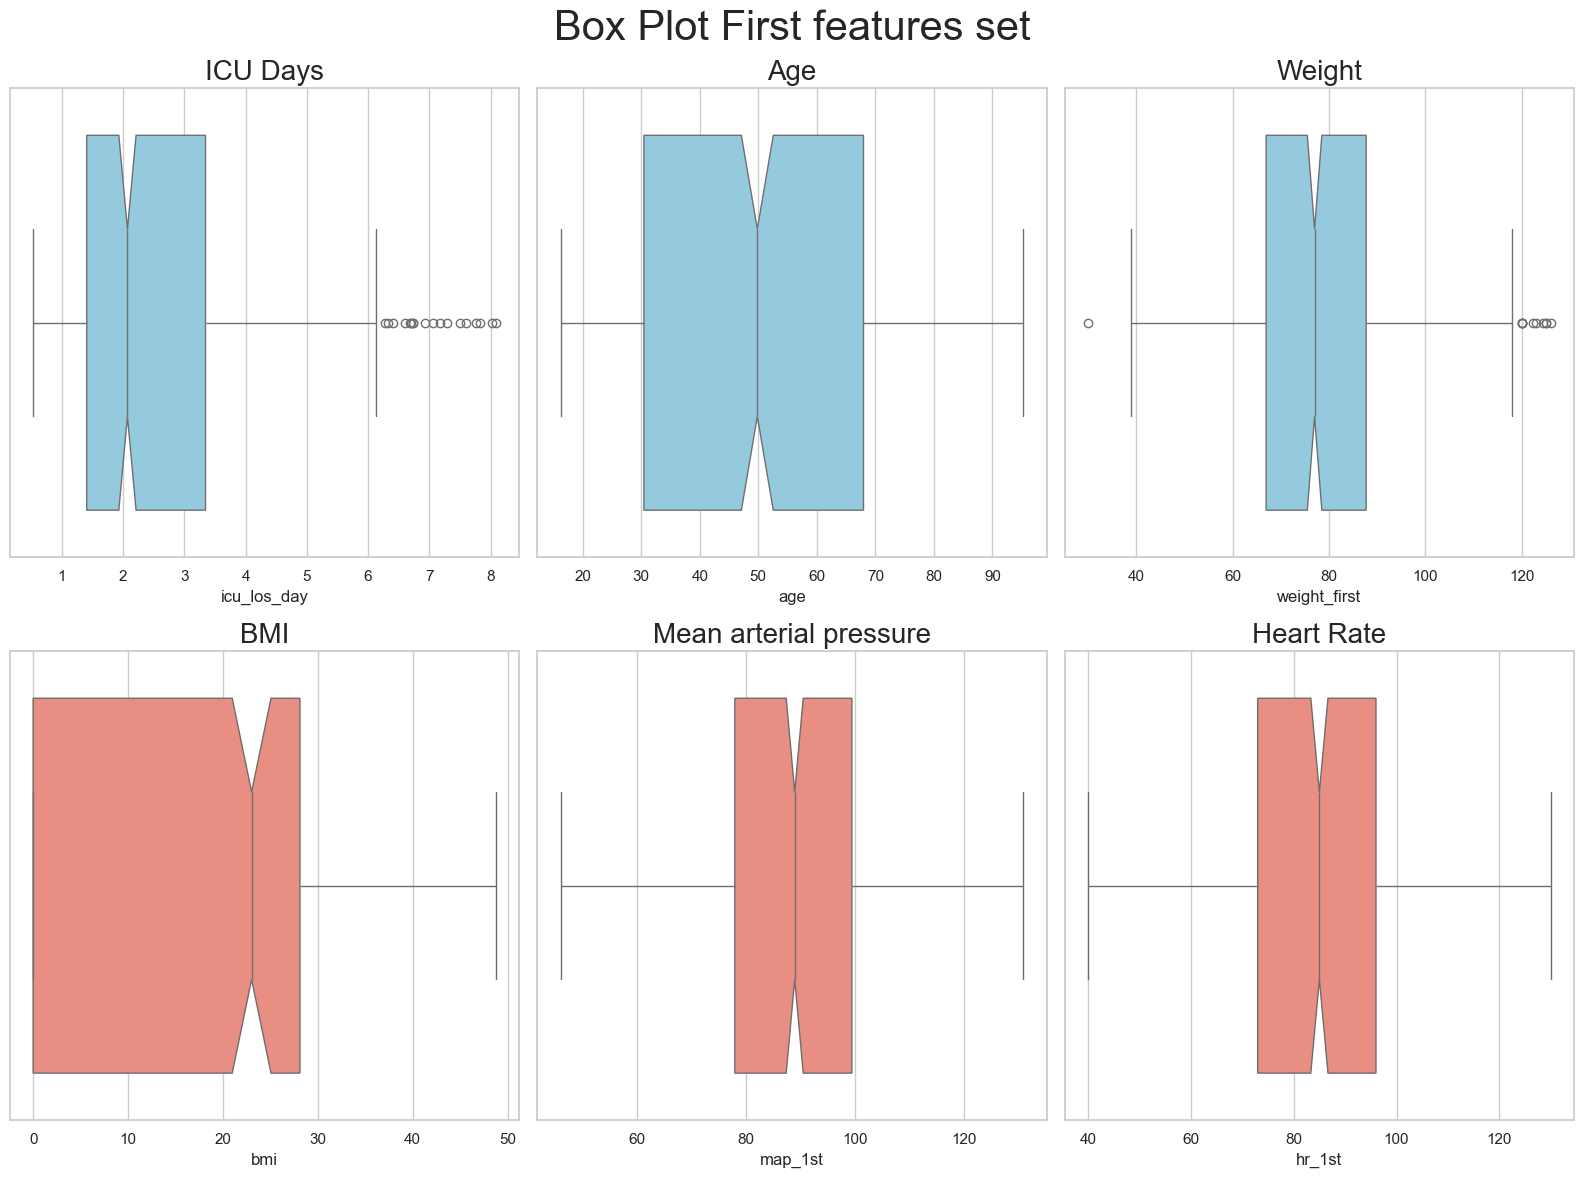

In [89]:
sns.set(style="whitegrid", palette="deep")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Box Plot First features set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.boxplot(data=x, x=first_features_set[i], notch=True, color="skyblue", ax=axes[0,i])
    else:
        sns.boxplot(data=x, x=first_features_set[i], notch=True, color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("ICU Days", fontsize=20)
axes[0,1].set_title("Age", fontsize=20)
axes[0,2].set_title("Weight", fontsize=20)
axes[1,0].set_title("BMI", fontsize=20)
axes[1,1].set_title("Mean arterial pressure", fontsize=20)
axes[1,2].set_title("Heart Rate", fontsize=20)

plt.tight_layout()
plt.show()

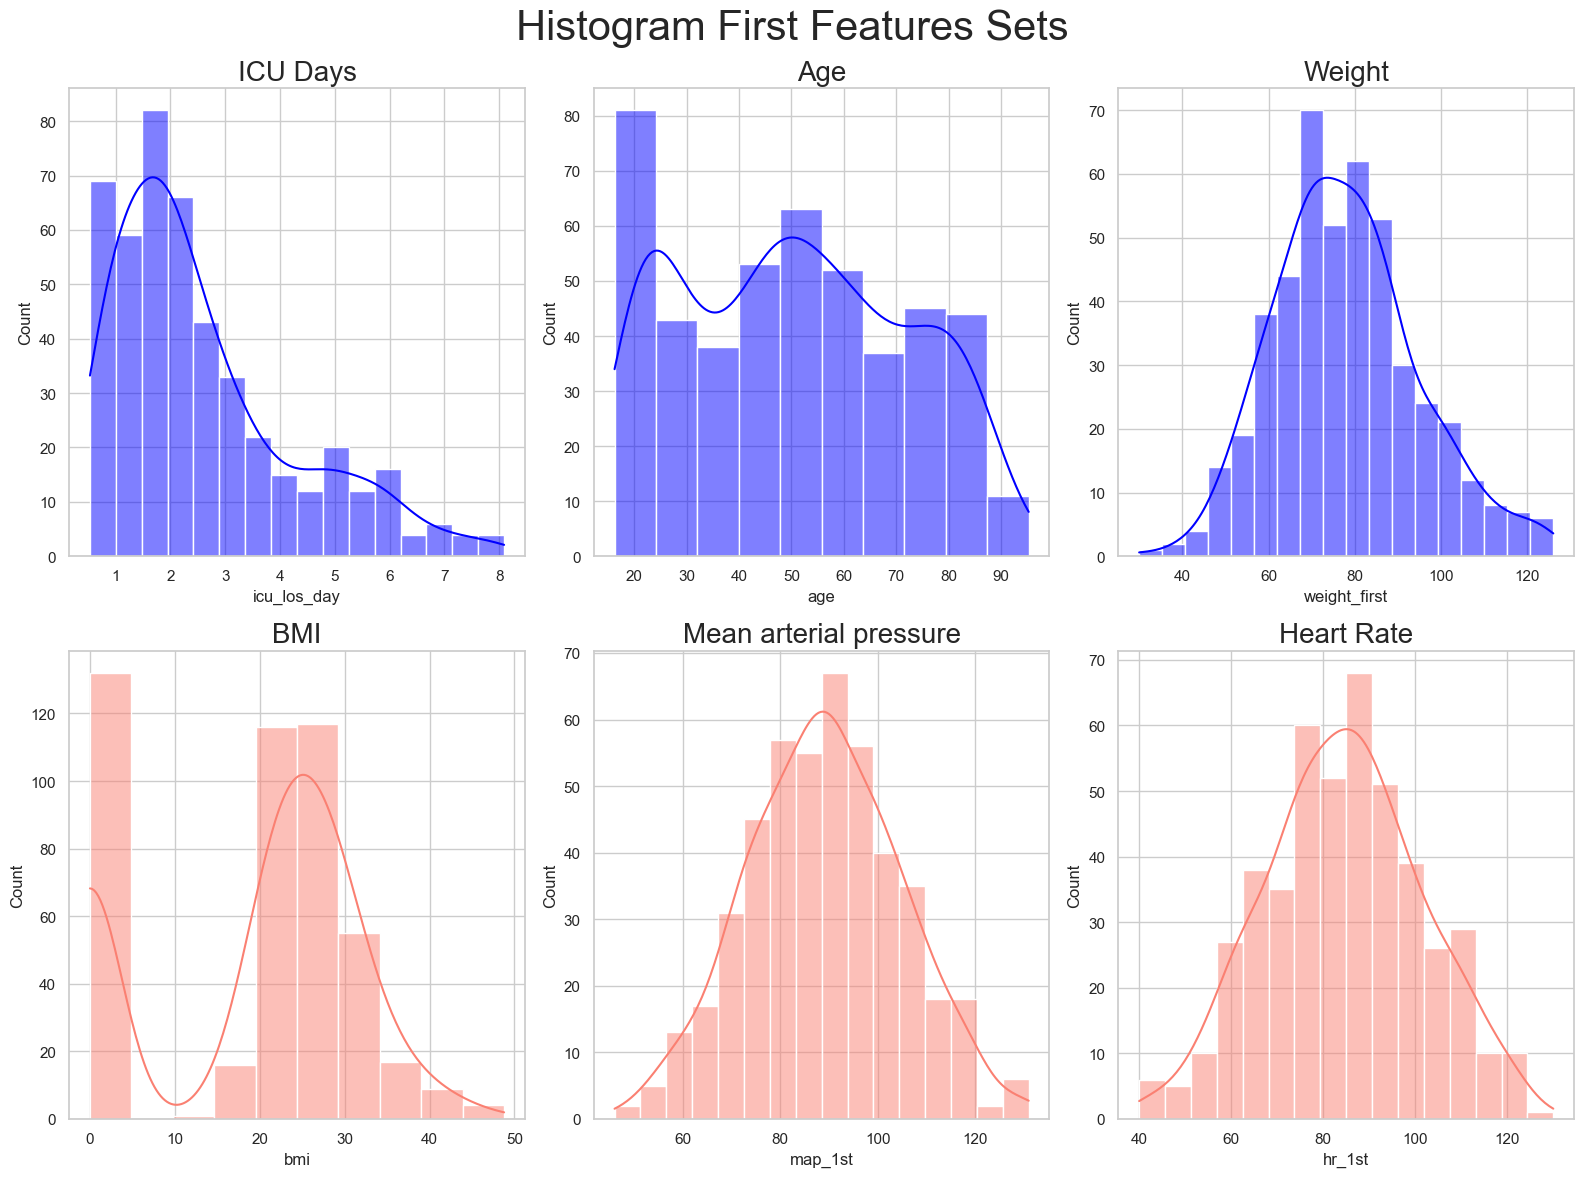

In [90]:
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
fig.suptitle("Histogram First Features Sets", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.histplot(x[first_features_set[i]], color="blue", kde=True, ax=axes[0,i], )
    else:
        sns.histplot(x[first_features_set[i]], color="salmon", kde=True, ax=axes[1,i-3])

axes[0,0].set_title("ICU Days", fontsize=20)
axes[0,1].set_title("Age", fontsize=20)
axes[0,2].set_title("Weight", fontsize=20)
axes[1,0].set_title("BMI", fontsize=20)
axes[1,1].set_title("Mean arterial pressure", fontsize=20)
axes[1,2].set_title("Heart Rate", fontsize=20)

plt.tight_layout()
plt.show()

### **Plotting the second features set**

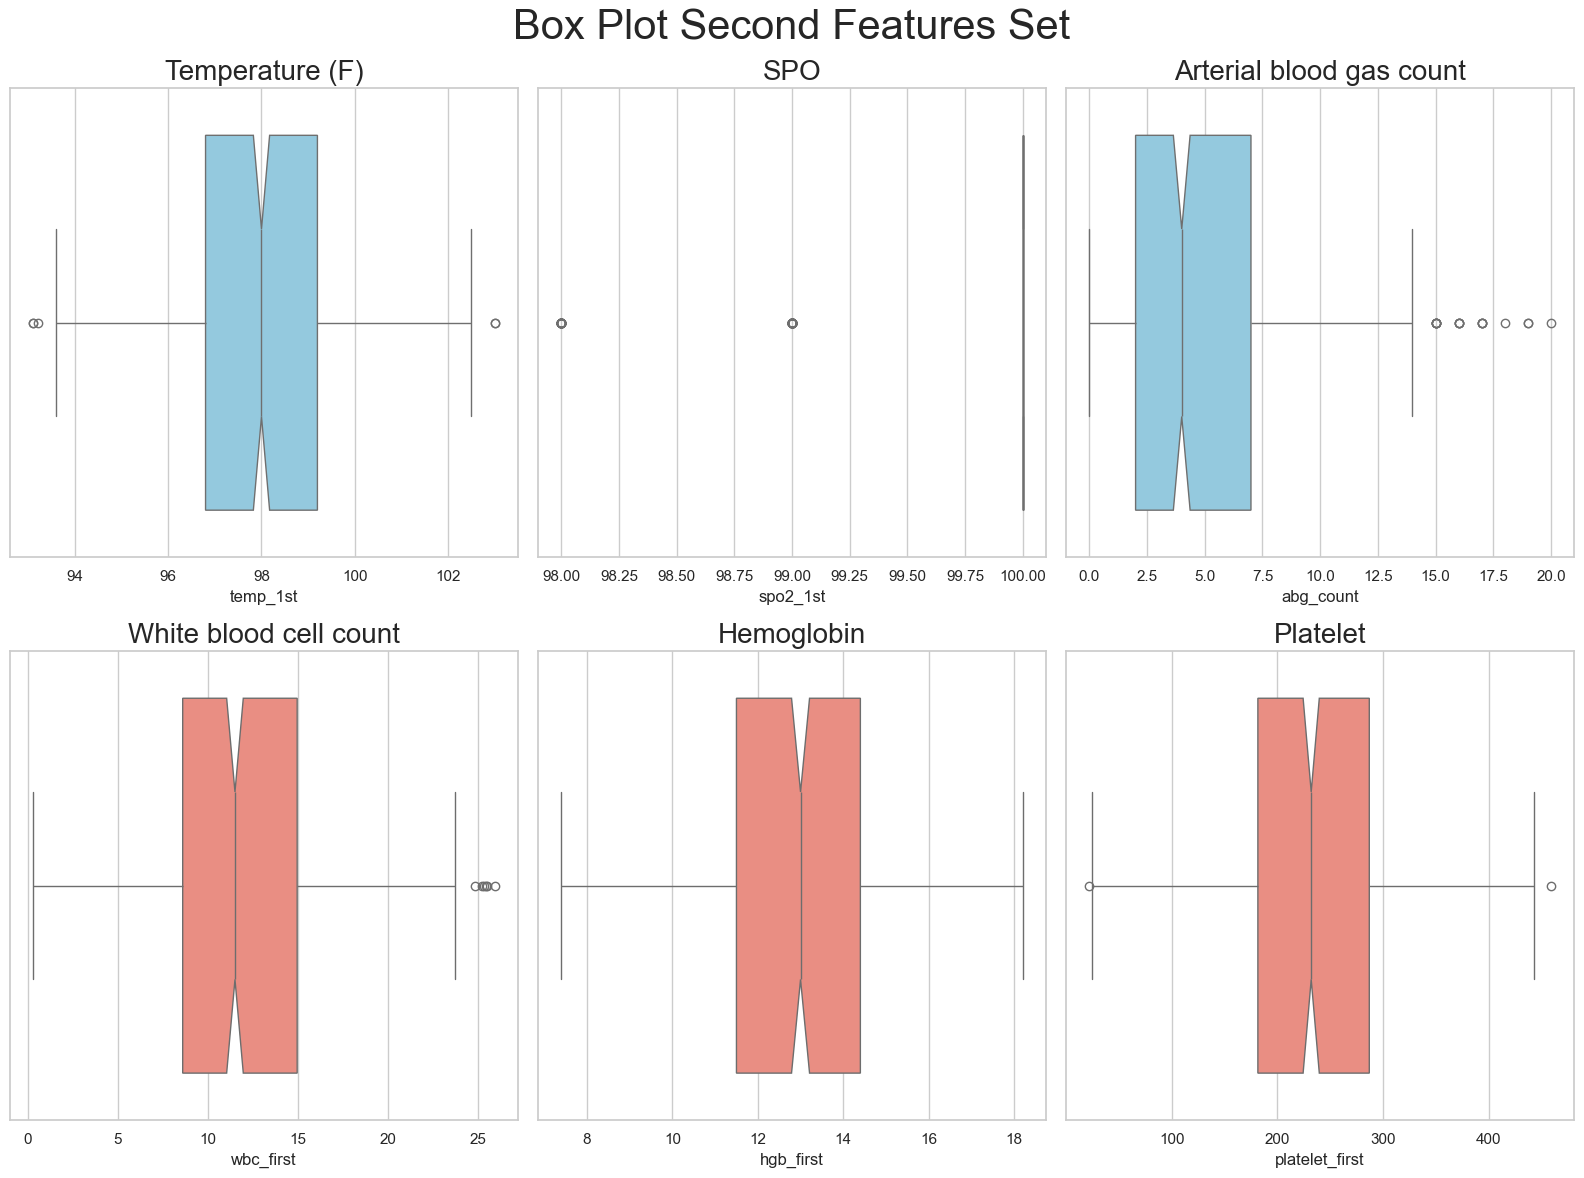

In [91]:
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Box Plot Second Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.boxplot(data=x, x=second_features_set[i], notch=True, color="skyblue", ax=axes[0,i])
    else:
        sns.boxplot(data=x, x=second_features_set[i], notch=True, color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("Temperature (F)", fontsize=20)
axes[0,1].set_title("SPO", fontsize=20)
axes[0,2].set_title("Arterial blood gas count", fontsize=20)
axes[1,0].set_title("White blood cell count", fontsize=20)
axes[1,1].set_title("Hemoglobin", fontsize=20)
axes[1,2].set_title("Platelet", fontsize=20)

plt.tight_layout()
plt.show()

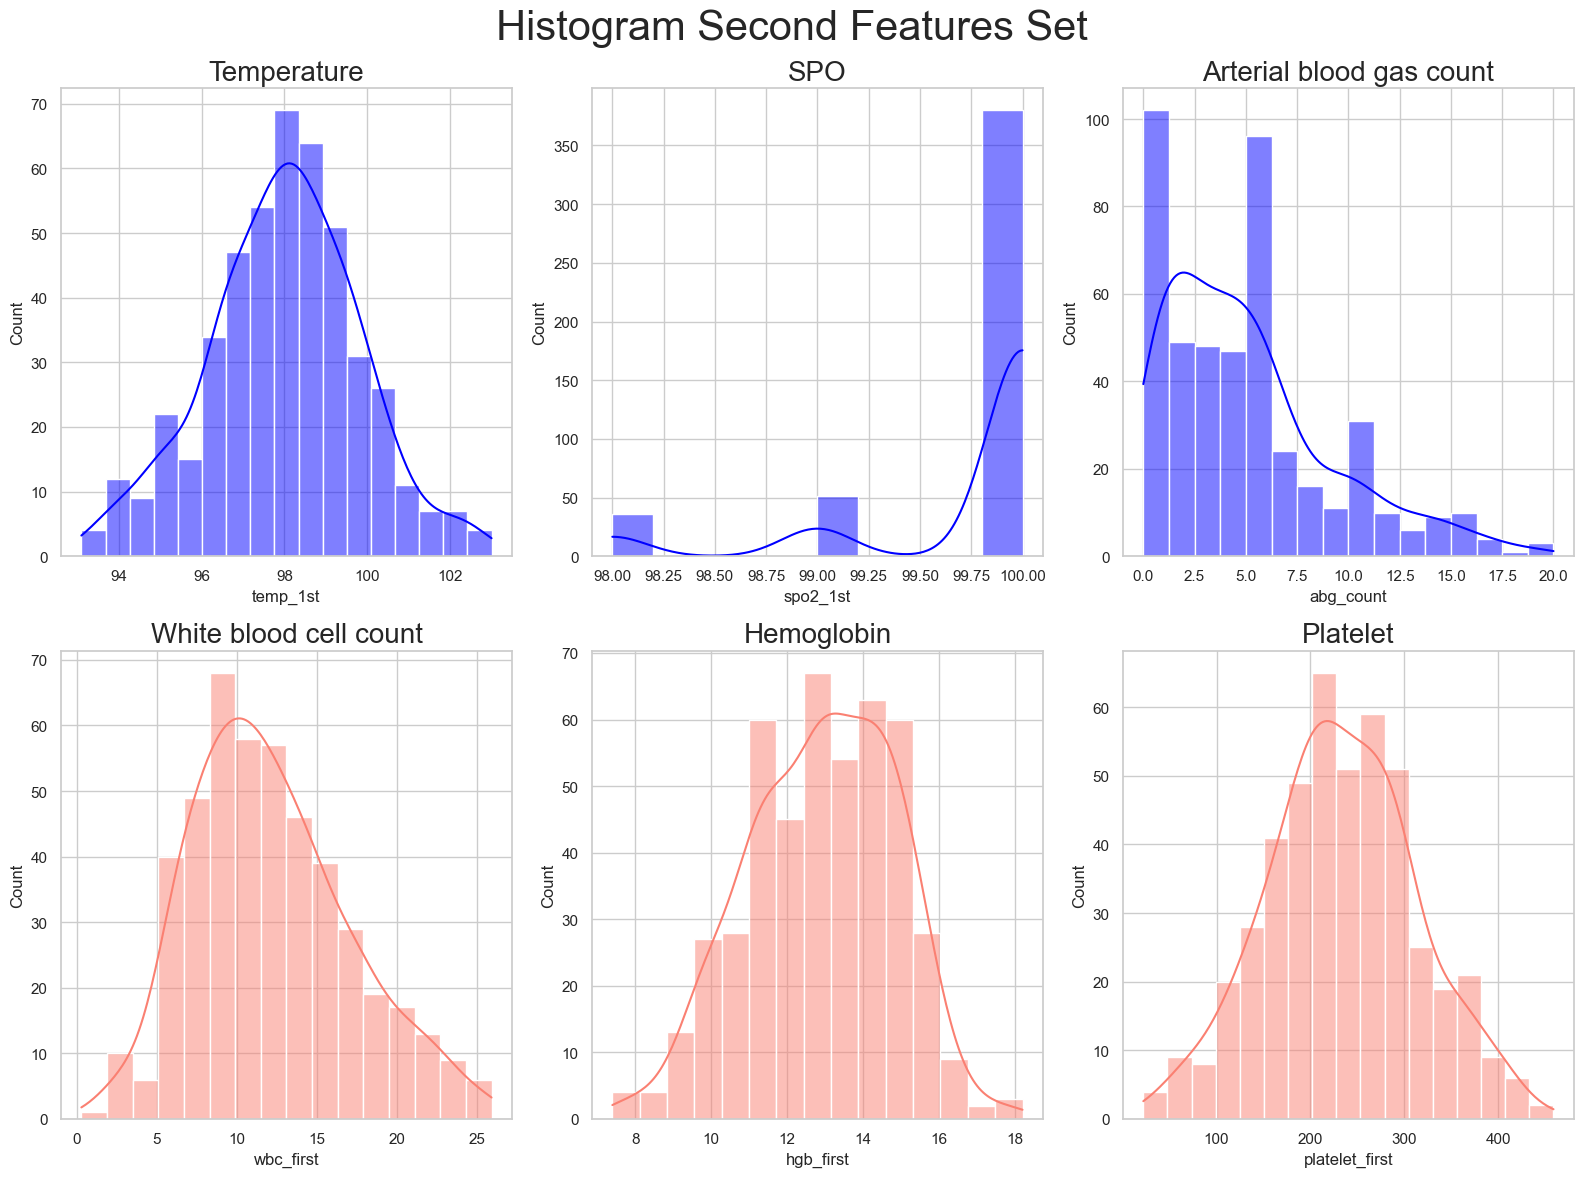

In [92]:
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Histogram Second Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.histplot(x[second_features_set[i]], kde=True, color="blue", ax=axes[0,i])
    else:
        sns.histplot(x[second_features_set[i]], kde=True, color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("Temperature", fontsize=20)
axes[0,1].set_title("SPO", fontsize=20)
axes[0,2].set_title("Arterial blood gas count", fontsize=20)
axes[1,0].set_title("White blood cell count", fontsize=20)
axes[1,1].set_title("Hemoglobin", fontsize=20)
axes[1,2].set_title("Platelet", fontsize=20)

plt.tight_layout()
plt.show()

### **Plotting the third features set**

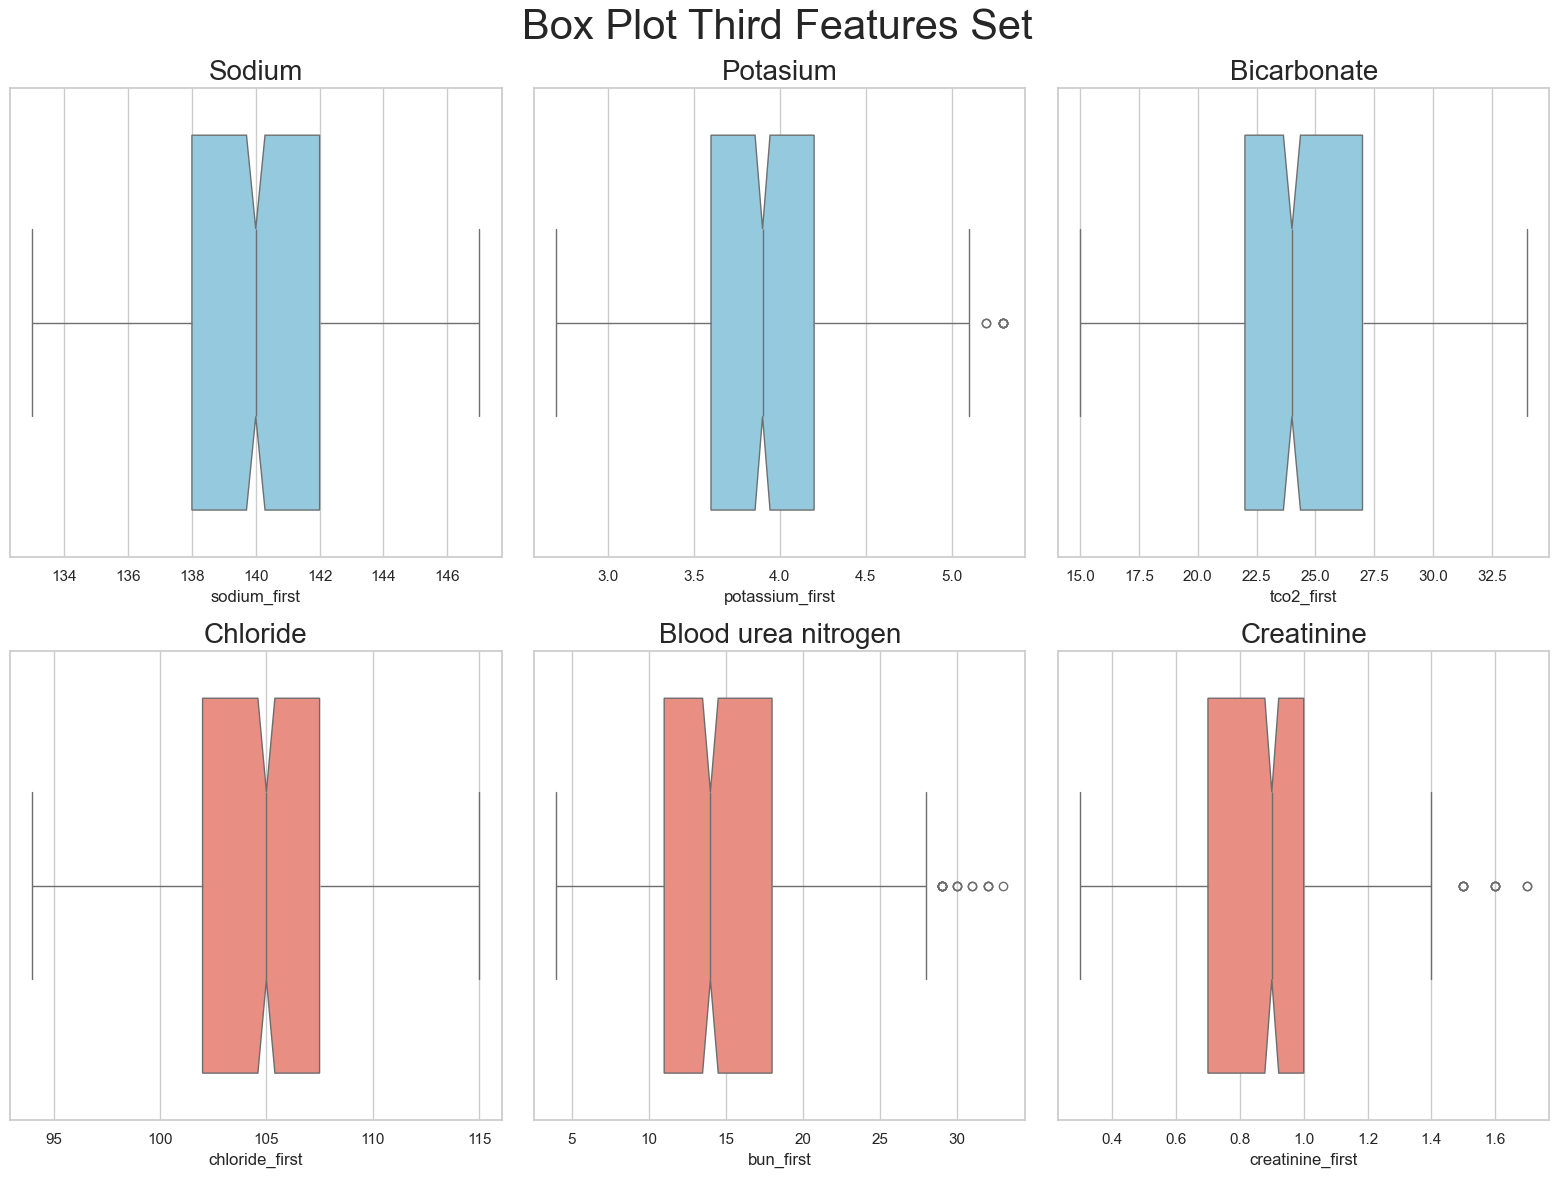

In [93]:
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Box Plot Third Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.boxplot(data=x, x=third_features_set[i], notch=True, color="skyblue", ax=axes[0,i])
    else:
        sns.boxplot(data=x, x=third_features_set[i], notch=True, color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("Sodium", fontsize=20)
axes[0,1].set_title("Potasium", fontsize=20)
axes[0,2].set_title("Bicarbonate", fontsize=20)
axes[1,0].set_title("Chloride", fontsize=20)
axes[1,1].set_title("Blood urea nitrogen", fontsize=20)
axes[1,2].set_title("Creatinine", fontsize=20)

plt.tight_layout()
plt.show()

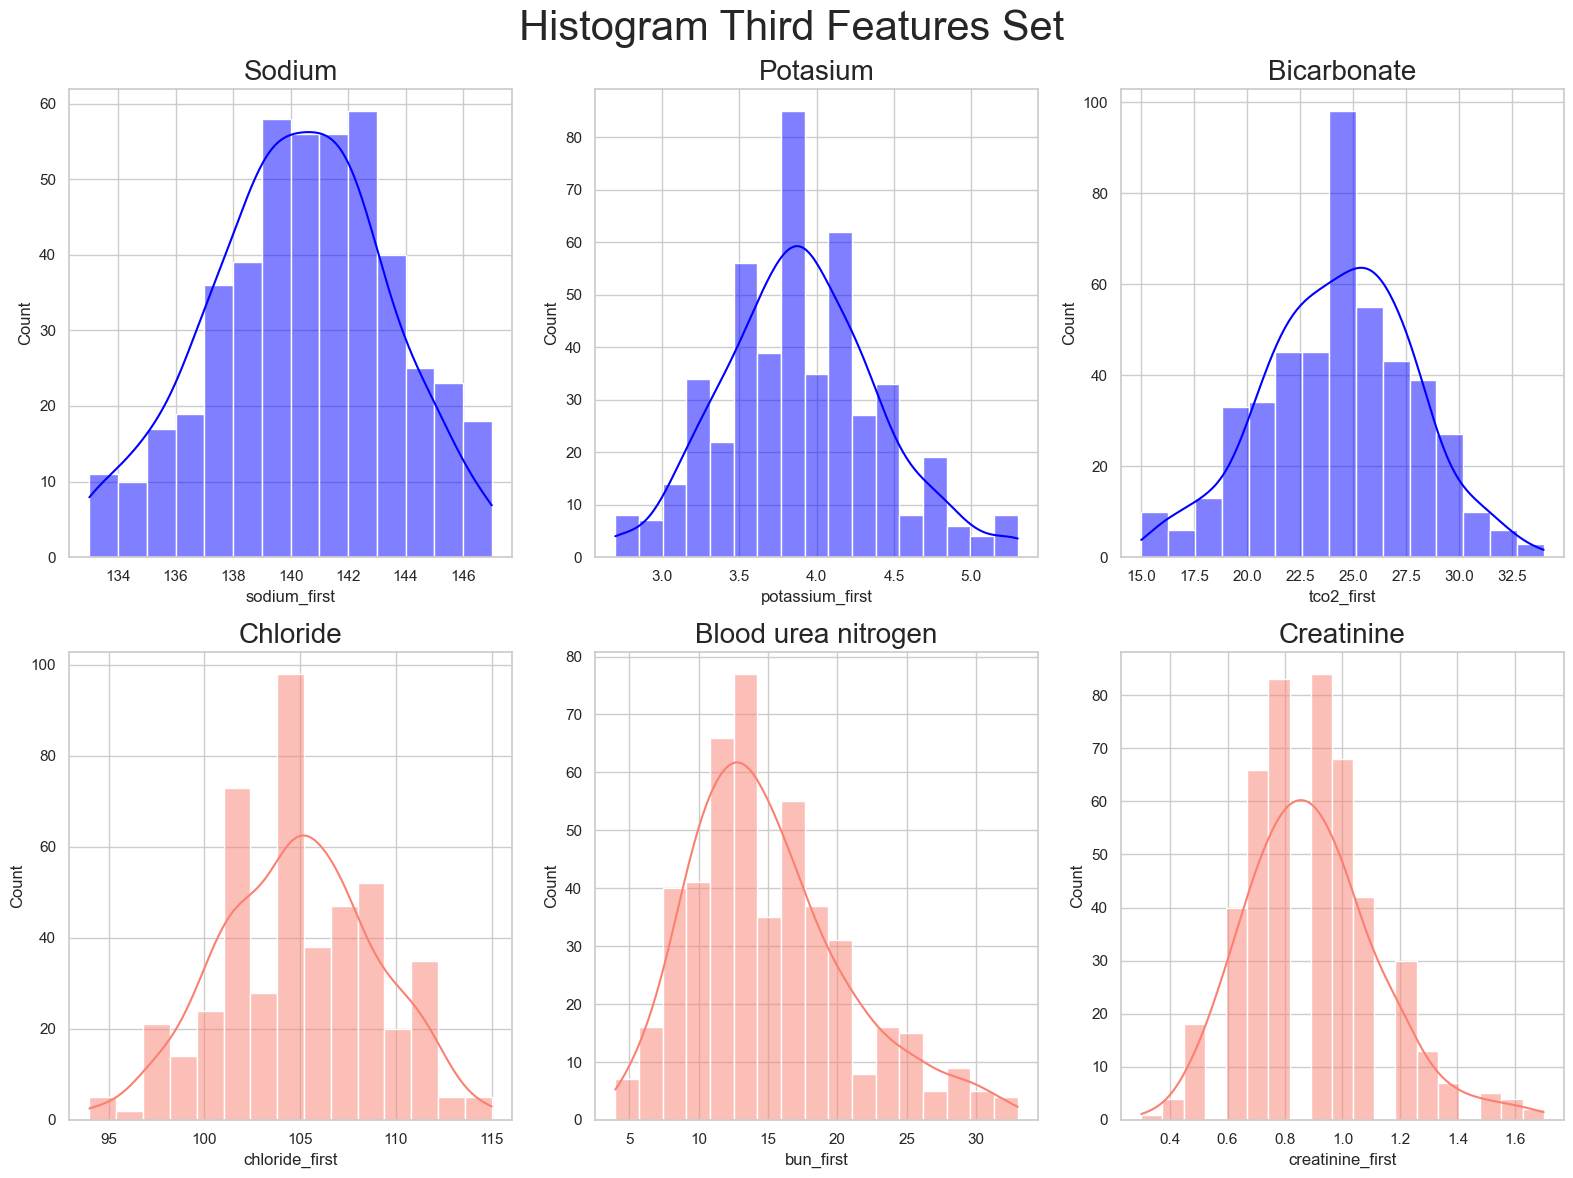

In [94]:
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Histogram Third Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.histplot(x[third_features_set[i]], kde=True, color="blue", ax=axes[0,i])
    else:
        sns.histplot(x[third_features_set[i]], kde=True, color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("Sodium", fontsize=20)
axes[0,1].set_title("Potasium", fontsize=20)
axes[0,2].set_title("Bicarbonate", fontsize=20)
axes[1,0].set_title("Chloride", fontsize=20)
axes[1,1].set_title("Blood urea nitrogen", fontsize=20)
axes[1,2].set_title("Creatinine", fontsize=20)

plt.tight_layout()
plt.show()

### **Plotting the fourth features set**

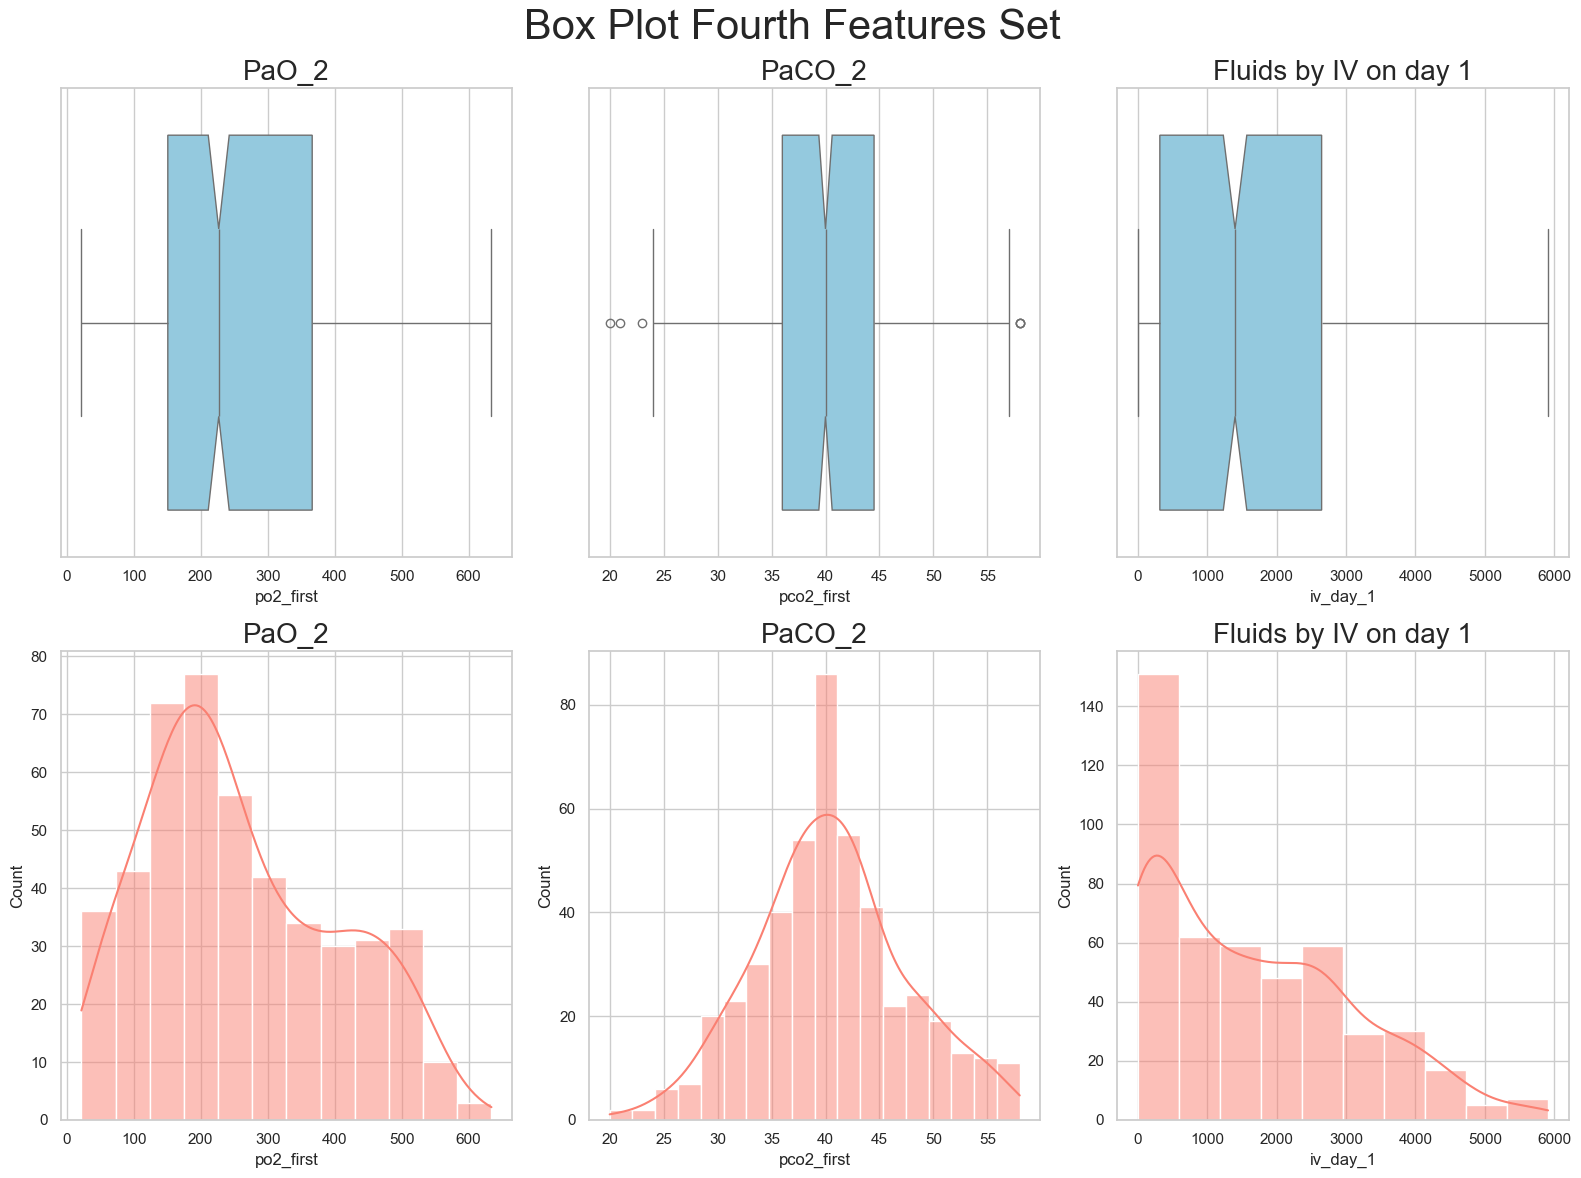

In [95]:
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,12))
fig.suptitle("Box Plot Fourth Features Set", fontsize=30)
for i in range(0,6):
    if i <= 2:
        sns.boxplot(data=x, x=fourth_features_set[i], notch=True, color="skyblue", ax=axes[0,i])
    else:
        sns.histplot(data=x, x=fourth_features_set[i-3], kde=True, color="salmon", ax=axes[1,i-3])

axes[0,0].set_title("PaO_2", fontsize=20)
axes[0,1].set_title("PaCO_2", fontsize=20)
axes[0,2].set_title("Fluids by IV on day 1", fontsize=20)
axes[1,0].set_title("PaO_2", fontsize=20)
axes[1,1].set_title("PaCO_2", fontsize=20)
axes[1,2].set_title("Fluids by IV on day 1", fontsize=20)

plt.tight_layout()
plt.show()

## **Standardising the dataset**

In [96]:
x_scaled = StandardScaler().fit_transform(x)

## **Analysing The Principal Components**

In [97]:
pca = PCA(n_components=21)
pca.fit_transform(x_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance_ratio)
explained_variance_ratioDF = pd.DataFrame([explained_variance_ratio, cum_explained_variance], index=['Explained Variance Ratio', 'Cumulative Variance Ratio'])
explained_variance_ratioDF.T

Explained Variance Ratio  Cumulative Variance Ratio
0                   0.121796                   0.121796
1                   0.098685                   0.220481
2                   0.083995                   0.304476
3                   0.069489                   0.373966
4                   0.063532                   0.437497
5                   0.060915                   0.498413
6                   0.056325                   0.554738
7                   0.051670                   0.606407
8                   0.049432                   0.655839
9                   0.047833                   0.703672
10                  0.043968                   0.747639
11                  0.036382                   0.784021
12                  0.035289                   0.819311
13                  0.034127                   0.853437
14                  0.029223                   0.882660
15                  0.026629                   0.909289
16                  0.023062                   0.932351
17                  0.021097                   0.953448
18                  0.017565                   0.971013
19                  0.016627                   0.987640
20                  0.012360                   1.000000

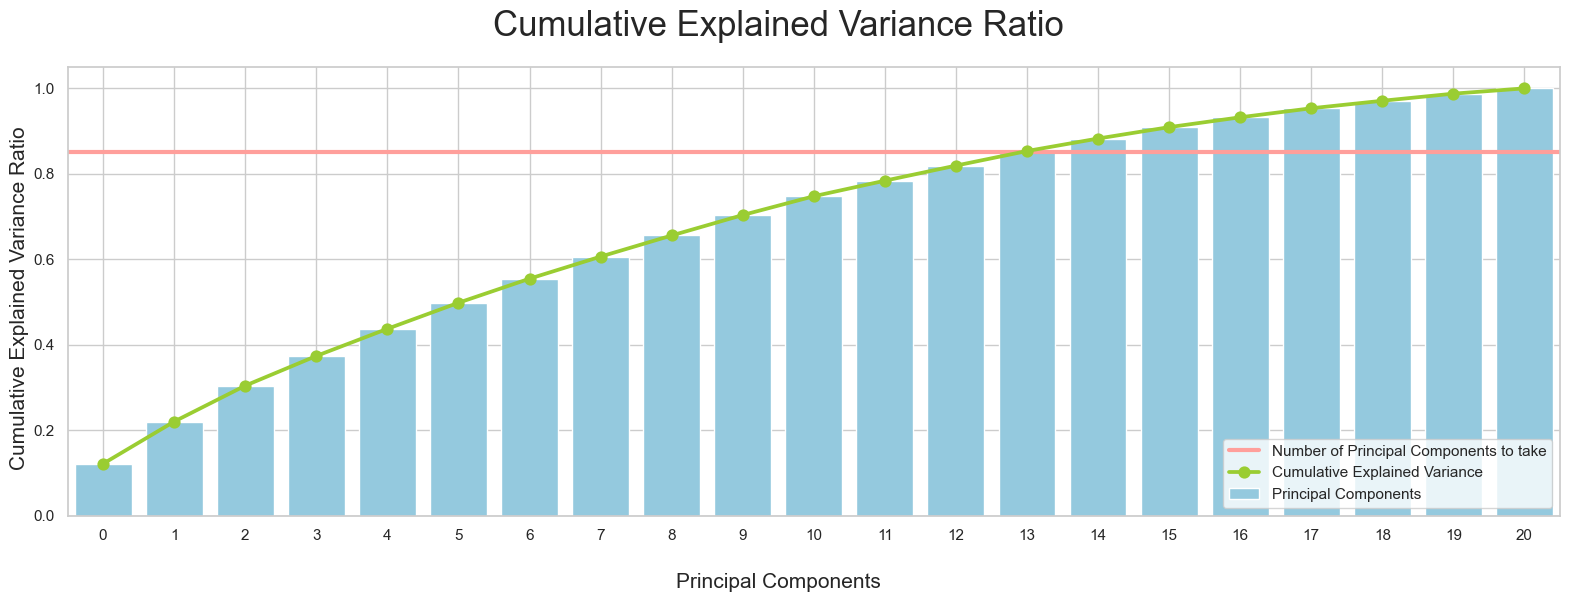

In [98]:
sns.set(style="whitegrid",palette="pastel")
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
fig.suptitle("Cumulative Explained Variance Ratio", fontsize=25)
fig.supxlabel("Principal Components", fontsize=15)
fig.supylabel("Cumulative Explained Variance Ratio", fontsize=15)
plt.axhline(y=0.85, linewidth=3, color='r', label="Number of Principal Components to take")
sns.barplot(cum_explained_variance, color="skyblue", label="Principal Components")
sns.pointplot(cum_explained_variance, color="yellowgreen", markers='o', label="Cumulative Explained Variance")
plt.grid(True)
plt.legend(loc=4)
plt.tight_layout()
plt.show()

## **Applying PCA**

In [99]:
pca = PCA(n_components=14)
principalComponents = pca.fit_transform(x_scaled)
principalComponentsDF = pd.DataFrame(principalComponents, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])
principalComponentsDF

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -1.444580  1.513119  1.730088  3.544788 -0.731669  0.189756  0.781381   
1   -0.277633 -1.867263 -1.456595  0.700877  0.516470  3.178609 -0.994271   
2   -2.721643  0.516399  0.328500  1.651848  1.956750  0.817556  1.631335   
3    3.357168  0.044393  1.513928  0.223442 -0.223343 -0.461776  2.849713   
4    0.368277 -0.615173  1.454871  0.656735 -1.124218 -2.068035 -0.327588   
..        ...       ...       ...       ...       ...       ...       ...   
462  0.615379  0.938286 -0.942012  0.732983 -0.452791  3.862508 -1.391897   
463 -1.337528 -0.631636 -1.457421  0.051118 -0.336155 -0.749443  1.765383   
464  1.583755  2.456167  0.900370 -1.721719  1.433256  0.656628  0.835575   
465  0.444973 -1.528980 -0.632992 -1.650587 -0.748951 -0.391051 -0.436497   
466  1.675134 -2.002240 -0.582599 -0.760690  0.467723 -0.952814  1.090565   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  
0    1.192133  0.191061  0.590414  0.546810 -1.232625  1.230143  1.058291  
1    1.151833  0.114709 -1.005737 -1.276065  0.381252  0.020679 -0.232865  
2   -0.142878 -0.811093 -1.076875  1.400483 -0.364402 -1.036809 -0.100957  
3   -2.130800 -0.597033 -1.954828  0.955070 -0.324705 -0.543136  0.056672  
4    0.945300 -0.790593 -0.014714 -0.146895  2.097596 -1.050793  1.035995  
..        ...       ...       ...       ...       ...       ...       ...  
462 -0.996474  0.162421  1.536673  0.182621 -0.323883  0.208868 -0.015079  
463 -0.969852  0.225639  0.989673  0.869646  0.226977  0.200022  0.832741  
464 -1.793627  1.223580  0.386142  0.471924 -0.795572 -0.289007  0.671179  
465 -0.809967 -0.670147  0.200890 -1.186794  0.531197  0.794301  0.101708  
466 -0.656595  1.357432  0.654751 -0.211750 -0.632332  1.365977  0.750411  

[467 rows x 14 columns]

In [100]:
# Show PCA characteristics
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', principalComponentsDF.shape)

Shape before PCA:  (467, 21)
Shape after PCA:  (467, 14)


In [101]:
# Assigning the targets
targets = UnitCareData.loc[:,target]
targets.shape

(467,)

In [102]:
# Choosing the target icu_exp_flg
y = targets
y.shape

(467,)

In [103]:
finalDF_PC = pd.DataFrame(data=np.c_[principalComponents, y], columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','TARGET'])
finalDF_PC

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -1.444580  1.513119  1.730088  3.544788 -0.731669  0.189756  0.781381   
1   -0.277633 -1.867263 -1.456595  0.700877  0.516470  3.178609 -0.994271   
2   -2.721643  0.516399  0.328500  1.651848  1.956750  0.817556  1.631335   
3    3.357168  0.044393  1.513928  0.223442 -0.223343 -0.461776  2.849713   
4    0.368277 -0.615173  1.454871  0.656735 -1.124218 -2.068035 -0.327588   
..        ...       ...       ...       ...       ...       ...       ...   
462  0.615379  0.938286 -0.942012  0.732983 -0.452791  3.862508 -1.391897   
463 -1.337528 -0.631636 -1.457421  0.051118 -0.336155 -0.749443  1.765383   
464  1.583755  2.456167  0.900370 -1.721719  1.433256  0.656628  0.835575   
465  0.444973 -1.528980 -0.632992 -1.650587 -0.748951 -0.391051 -0.436497   
466  1.675134 -2.002240 -0.582599 -0.760690  0.467723 -0.952814  1.090565   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    1.192133  0.191061  0.590414  0.546810 -1.232625  1.230143  1.058291   
1    1.151833  0.114709 -1.005737 -1.276065  0.381252  0.020679 -0.232865   
2   -0.142878 -0.811093 -1.076875  1.400483 -0.364402 -1.036809 -0.100957   
3   -2.130800 -0.597033 -1.954828  0.955070 -0.324705 -0.543136  0.056672   
4    0.945300 -0.790593 -0.014714 -0.146895  2.097596 -1.050793  1.035995   
..        ...       ...       ...       ...       ...       ...       ...   
462 -0.996474  0.162421  1.536673  0.182621 -0.323883  0.208868 -0.015079   
463 -0.969852  0.225639  0.989673  0.869646  0.226977  0.200022  0.832741   
464 -1.793627  1.223580  0.386142  0.471924 -0.795572 -0.289007  0.671179   
465 -0.809967 -0.670147  0.200890 -1.186794  0.531197  0.794301  0.101708   
466 -0.656595  1.357432  0.654751 -0.211750 -0.632332  1.365977  0.750411   

     TARGET  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       1.0  
..      ...  
462     0.0  
463     0.0  
464     0.0  
465     0.0  
466     0.0  

[467 rows x 15 columns]

## **Plotting the Principal Components**

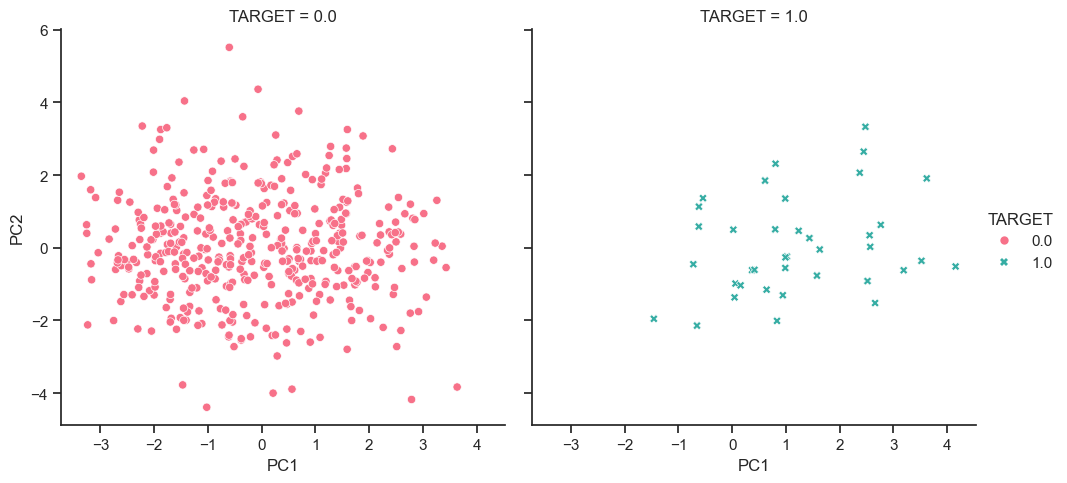

In [104]:
sns.set(style="ticks", palette="deep")
sns.relplot(data=finalDF_PC, x="PC1", y="PC2", col="TARGET", hue="TARGET", kind="scatter", style="TARGET", palette="husl", legend="auto")
plt.show()

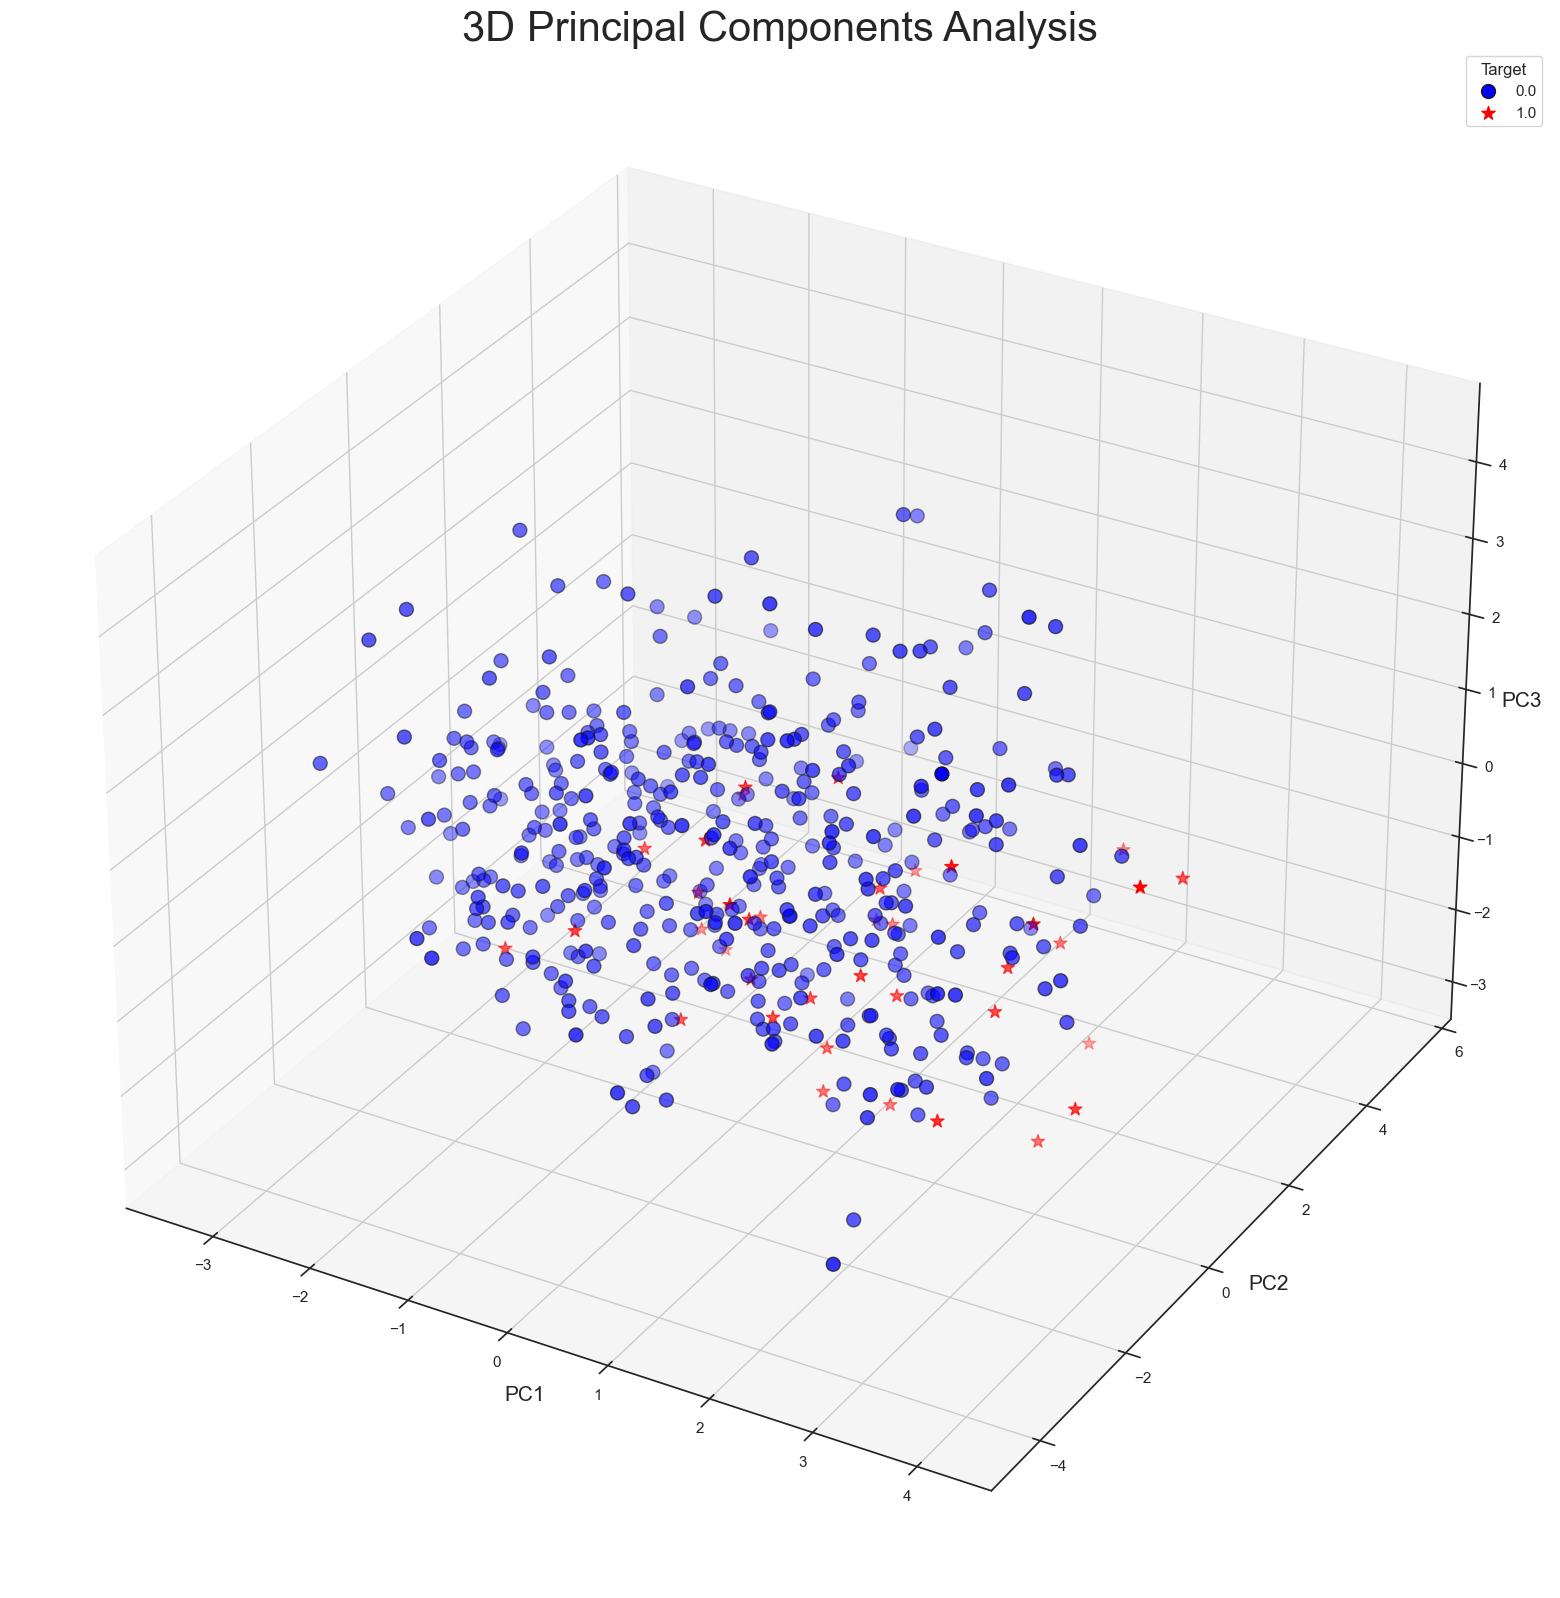

In [105]:
figure = plt.figure(figsize=(20,20))
ax = figure.add_subplot(111, projection='3d')
ax.set_title("3D Principal Components Analysis", fontsize=30)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_zlabel('PC3', fontsize=15)
ax.set_label("Target")
targets = set(finalDF_PC['TARGET'])
colours = ["blue","red"]

for target, colour in zip(targets, colours):
    indextokeep = finalDF_PC['TARGET'] == target

    if target == 1:
        ax.scatter(finalDF_PC.loc[indextokeep,'PC1'],
                    finalDF_PC.loc[indextokeep,'PC2'],
                    finalDF_PC.loc[indextokeep,'PC3'],
                    s=100,
                    c=colour,
                    marker='*')
    else:
        ax.scatter(finalDF_PC.loc[indextokeep,'PC1'],
                    finalDF_PC.loc[indextokeep,'PC2'],
                    finalDF_PC.loc[indextokeep,'PC3'],
                    s=100,
                    edgecolors='k',
                    c=colour,
                    marker='o')

ax.legend(targets, title="Target")
ax.autoscale_view(60,40)
ax.grid(True)
plt.show()

## **Computing PCA Loadings and The Loading Matrix**

In [106]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])
loadings_df['Features'] = features
loadings_df = loadings_df.set_index('Features')
loadings_df

PC1       PC2       PC3       PC4       PC5       PC6  \
Features                                                                       
icu_los_day       0.374729  0.141460  0.610348 -0.292604  0.229780  0.108827   
age               0.768432 -0.078736 -0.173170  0.060415  0.031264 -0.093674   
weight_first     -0.176026 -0.558898  0.252260  0.242265 -0.062240  0.007051   
bmi              -0.016739 -0.040955  0.303178  0.398085 -0.094439 -0.022642   
map_1st           0.019724 -0.108925  0.000421 -0.072103 -0.350870 -0.077314   
hr_1st           -0.502969 -0.165311  0.413313 -0.065220 -0.227340 -0.108505   
temp_1st         -0.227236 -0.351600  0.265428 -0.008889 -0.153475 -0.164516   
spo2_1st         -0.112849  0.200529  0.014799  0.309541  0.080883  0.132517   
abg_count         0.365126  0.169371  0.691935 -0.100420  0.185034  0.113483   
wbc_first        -0.436491  0.005765  0.005849 -0.403056  0.385065 -0.137071   
hgb_first        -0.427873 -0.433931  0.042046 -0.245969 -0.158741 -0.154044   
platelet_first   -0.220476 -0.124715 -0.242983 -0.625848  0.231917 -0.007711   
sodium_first     -0.510142 -0.216321 -0.112571  0.163757  0.382187  0.352170   
potassium_first   0.199916 -0.405274  0.212152 -0.033777 -0.158459 -0.284072   
tco2_first        0.411094 -0.401478 -0.116773 -0.186587  0.001200  0.558768   
chloride_first   -0.414017  0.336200  0.118135  0.471556  0.253228  0.128274   
bun_first         0.504234 -0.399692 -0.105590  0.137210  0.443129 -0.298091   
creatinine_first  0.004893 -0.523233 -0.054581  0.307651  0.467827 -0.354933   
po2_first        -0.156782  0.319479 -0.165472 -0.094319  0.283452 -0.222721   
pco2_first       -0.063598 -0.520286  0.025587  0.007768  0.091838  0.586668   
iv_day_1         -0.065083  0.097169  0.548701 -0.135401  0.254485 -0.030614   

                       PC7       PC8       PC9      PC10      PC11      PC12  \
Features                                                                       
icu_los_day       0.018750  0.093635  0.208281  0.217425  0.087724  0.165875   
age              -0.115265  0.090779  0.208498 -0.027954 -0.112486  0.027154   
weight_first      0.171468  0.067365 -0.188933 -0.296071  0.107876 -0.074401   
bmi              -0.002090  0.267816  0.237279 -0.638589 -0.013302  0.175760   
map_1st           0.273720  0.610321  0.202880  0.226225 -0.415248 -0.326523   
hr_1st           -0.124473 -0.247814  0.122794  0.084700 -0.156305 -0.297515   
temp_1st         -0.283488 -0.398516  0.526338  0.093577 -0.012725  0.002716   
spo2_1st          0.387608 -0.324495  0.085902  0.041584 -0.647071  0.349963   
abg_count         0.117150  0.131971  0.067132  0.044181  0.042012  0.021281   
wbc_first        -0.312871  0.062015  0.055060 -0.184009 -0.220431  0.052225   
hgb_first         0.377230  0.151926  0.073140  0.121939  0.248953  0.304597   
platelet_first   -0.083960  0.182730 -0.014232 -0.257634 -0.232253  0.134242   
sodium_first      0.074422  0.257152  0.292401  0.235950  0.149667  0.077568   
potassium_first  -0.140433  0.034205 -0.447629  0.336093 -0.125792  0.330857   
tco2_first        0.166275 -0.218327  0.148629 -0.030159  0.058920 -0.034406   
chloride_first   -0.350374  0.234676 -0.087394  0.265810  0.001028 -0.002041   
bun_first        -0.149164  0.008630  0.118779  0.030121 -0.100600 -0.182176   
creatinine_first  0.207633 -0.029823 -0.026999  0.064737 -0.000321 -0.018129   
po2_first         0.512993 -0.197940  0.057416  0.054437  0.124930 -0.208978   
pco2_first       -0.114878 -0.040158 -0.263174  0.031652 -0.189936 -0.153190   
iv_day_1          0.207234 -0.081114 -0.323586 -0.167275 -0.087415 -0.228167   

                      PC13      PC14  
Features                              
icu_los_day      -0.043472  0.091213  
age               0.014063 -0.095391  
weight_first     -0.172708  0.405636  
bmi              -0.153466 -0.338502  
map_1st          -0.001686  0.007003  
hr_1st           -0.057286 -0.024770  
temp_1st          0.043225 -0

## **Plotting Correlation among the features and principal components**

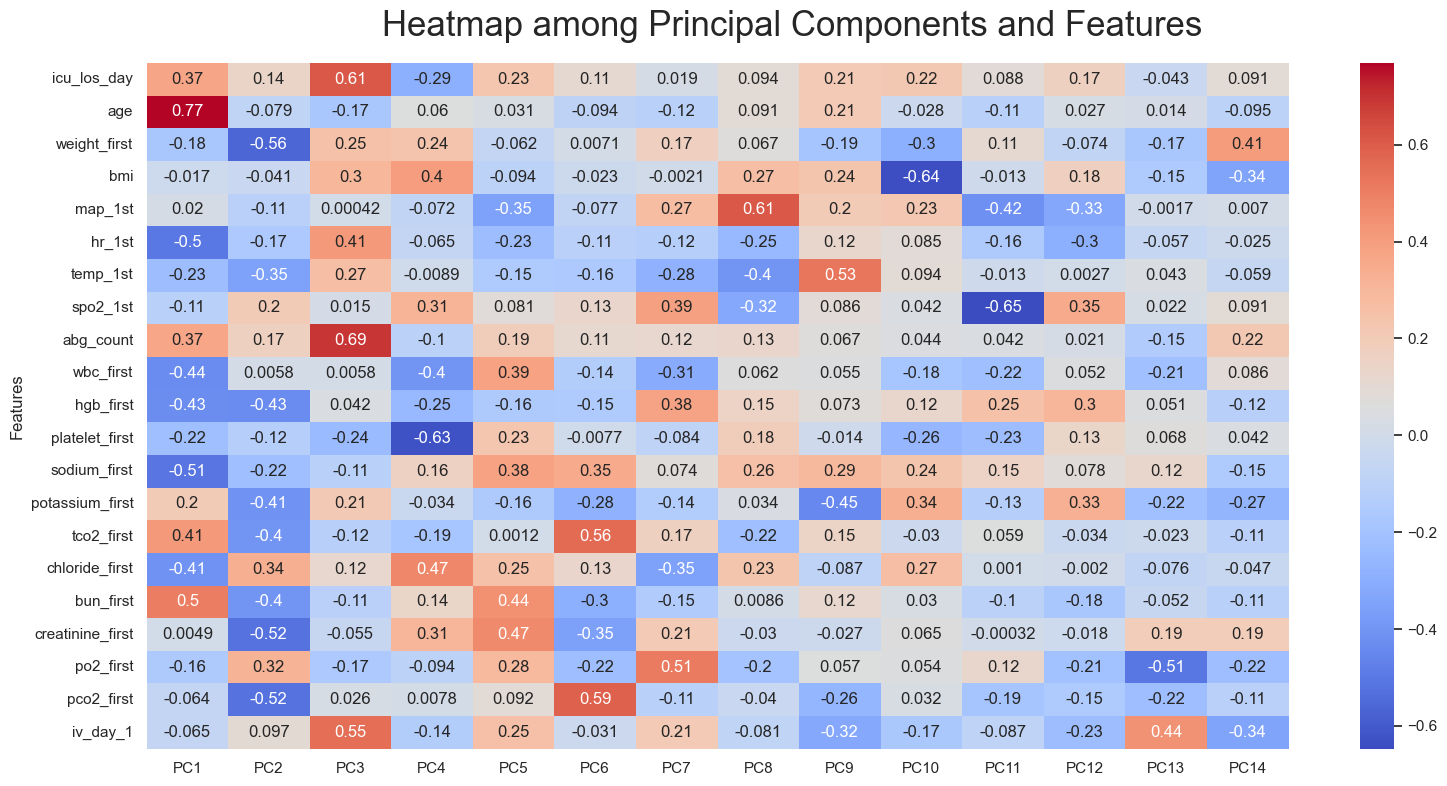

In [107]:
n_pc = 14
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
fig.suptitle("Heatmap among Principal Components and Features", fontsize=25)
sns.heatmap(loadings_df.iloc[:,:n_pc], cmap="coolwarm", annot=True)
plt.tight_layout()
plt.show()

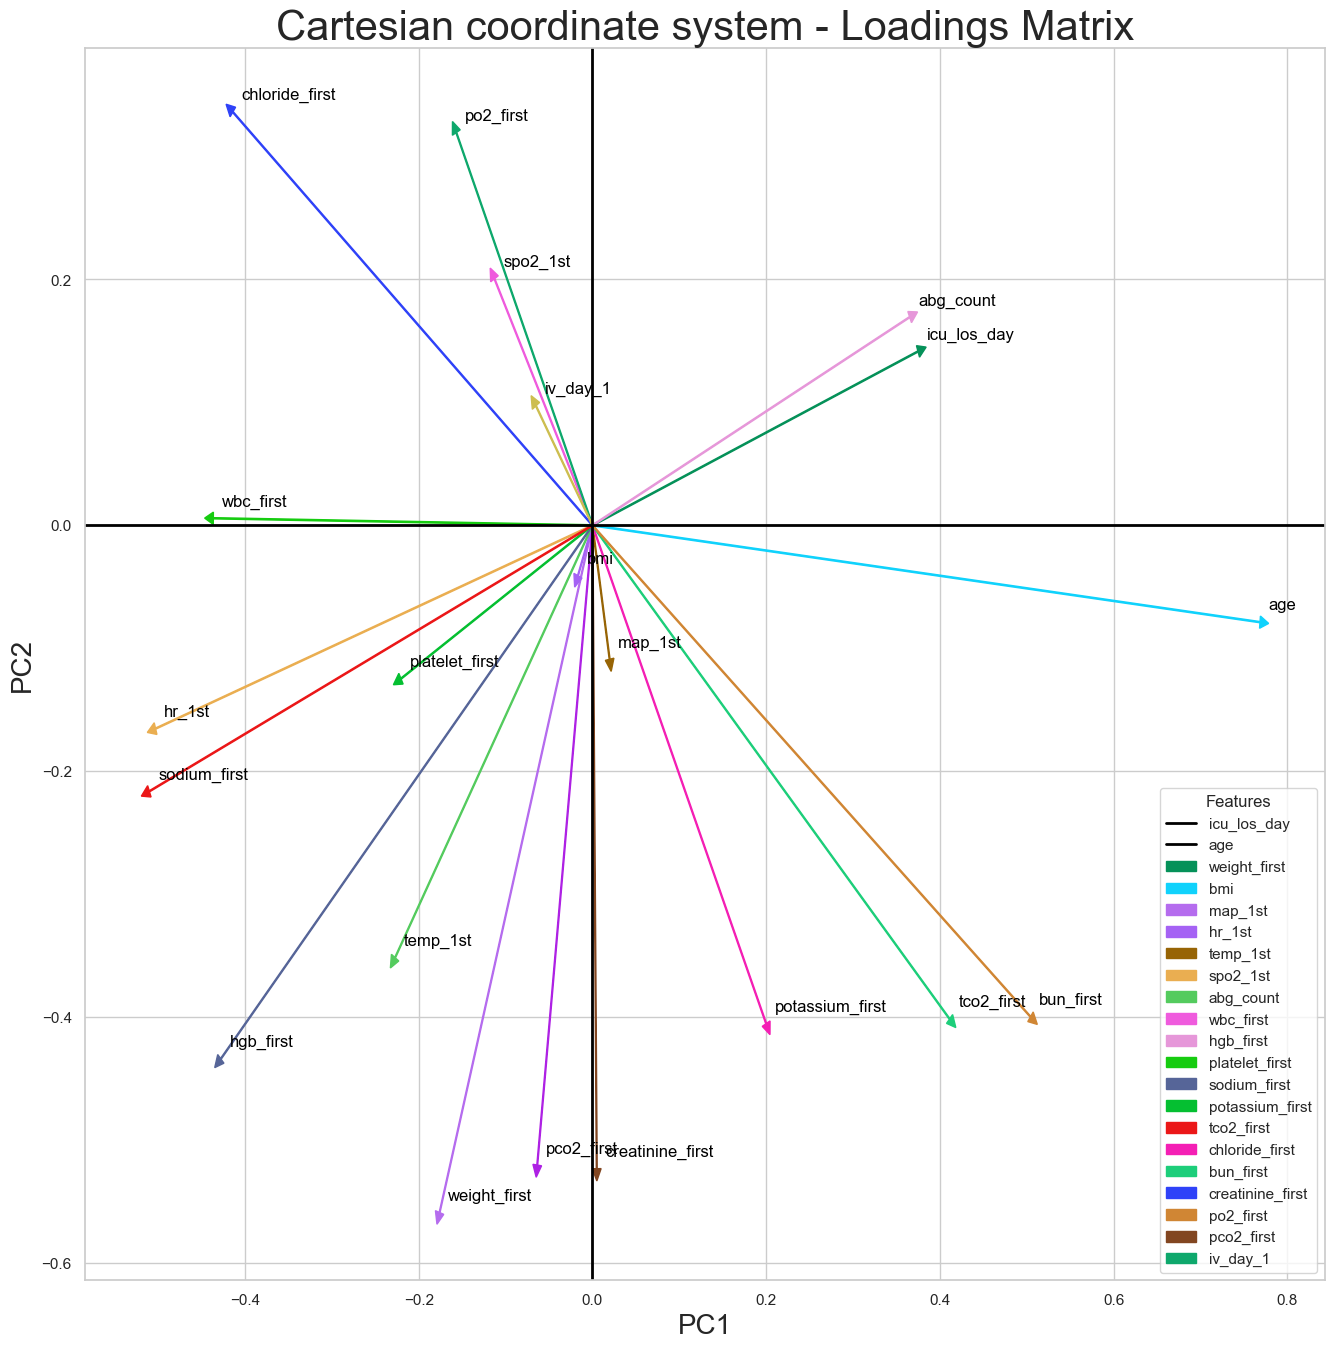

In [108]:
figure = plt.figure(figsize=(16,16))
ax = figure.add_subplot(1,1,1)
ax.set_title("Cartesian coordinate system - Loadings Matrix", fontsize=30)
ax.set_xlabel("PC1", fontsize=20)
ax.set_ylabel("PC2", fontsize=20)
ax.axhline(y=0, color="black", linewidth="2")
ax.axvline(x=0, color="black", linewidth="2")
colours = ['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for _ in range(22)]

xs = loadings[:,0] #Loadings for PC1
ys = loadings[:,1] #Loadings for PC2

for i, values in enumerate(features):
    ax.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color=colours[i], 
        head_width = 0.01,
        head_length = 0.01
        )
    ax.text(xs[i]+0.010, ys[i]+0.010, values, color="black")
ax.legend(features, title="Features")
ax.grid(True)
plt.show()

## **Logistic Regression**

### **Selecting the independent variables and target**

In [109]:
# Selecting variable which are not correlated among them just to get better result in my model
features = ['abg_count',
            'chloride_first','iv_day_1','wbc_first','po2_first','temp_1st',
            'bmi','platelet_first','sodium_first','weight_first','hgb_first',
            'potassium_first','age','map_1st','creatinine_first','bun_first']

X = UnitCareData[features]
y = UnitCareData.icu_exp_flg

### **Selecting the train and test data**

In [110]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.20, random_state=42)

In [111]:
# 80% for training
X_train

abg_count  chloride_first     iv_day_1  wbc_first  po2_first   temp_1st  \
791        4.0            98.0   805.246704        6.5        206  97.500000   
40         1.0           101.0  1550.000000        7.1        214  96.000000   
643        1.0           105.0  2663.775879       12.4        342  93.699997   
83         0.0           103.0  1886.840088        8.4        227  98.400002   
307        2.0           108.0     0.000000        5.9        393  98.000000   
..         ...             ...          ...        ...        ...        ...   
194        5.0           109.0  2130.000000       12.3        519  99.300003   
548        5.0           105.0  1365.000000       11.1        144  96.900002   
728        5.0           101.0   331.679993        8.4        214  97.599998   
903        5.0           101.0   300.000000       15.7        169  98.900002   
186        8.0           107.0  1289.574463       14.3        591  93.099998   

           bmi  platelet_first  sodium_first  weight_first  hgb_first  \
791   0.000000           190.0         136.0          86.0       13.3   
40   26.416399           290.0         142.0          75.0       16.6   
643  32.419808           285.0         136.0          86.6       12.2   
83   28.266195           174.0         136.0          96.0       15.7   
307  24.604283           145.0         142.0          75.0       14.9   
..         ...             ...           ...           ...        ...   
194  17.930001           245.0         140.0          58.0       12.4   
548  29.086191           255.0         138.0         100.0       15.7   
728   0.000000           191.0         140.0          66.0       11.9   
903   0.000000           225.0         143.0          82.0       14.8   
186  25.982281           208.0         143.0          76.8       15.0   

     potassium_first       age     map_1st  creatinine_first  bun_first  
791              4.1  69.07983   52.000000               0.9       11.0  
40               5.0  49.52885   71.000000               1.6       18.0  
643              3.8  23.24771   69.666702               0.8       13.0  
83               4.6  50.45494  104.000000               1.2       32.0  
307              3.9  52.34117   75.000000               1.0       13.0  
..               ...       ...         ...               ...        ...  
194              2.7  45.86340   79.000000               0.6        5.0  
548              3.9  60.55278   60.000000               1.0       15.0  
728              4.3  82.16339   87.000000               1.0       13.0  
903              4.0  21.76155   86.000000               0.8       10.0  
186              3.9  33.57515  108.667000               0.8        5.0  

[373 rows x 16 columns]

In [112]:
# 20% for testing
X_test

abg_count  chloride_first     iv_day_1  wbc_first  po2_first    temp_1st  \
98         2.0           102.0  2167.199951        6.8        477   99.400002   
110        3.0           101.0   117.125000       10.7        237   98.400002   
64         0.0           105.0  1411.989990       17.1        546  100.099998   
959        6.0           109.0   262.279999        6.4         95   97.500000   
128        9.0            99.0  3414.355957       13.2        123   95.099998   
..         ...             ...          ...        ...        ...         ...   
559        3.0           112.0  3818.499756       10.0        233   97.099998   
924        7.0           102.0  2250.494629       21.4        416   99.500000   
386       10.0            98.0   846.882019       18.1        426   98.199997   
381        4.0           110.0   885.570923       14.4        317   94.800003   
280        2.0           111.0     0.000000       13.2        218   95.099998   

           bmi  platelet_first  sodium_first  weight_first  hgb_first  \
98   25.541366           272.0         141.0          70.0       11.9   
110  23.958221           262.0         136.0          56.9       13.3   
64   25.760850           171.0         145.0          81.1       15.7   
959   0.000000           161.0         145.0          62.0        9.6   
128  21.812486           405.0         142.0          61.3       13.5   
..         ...             ...           ...           ...        ...   
559  19.780206           238.0         140.0          70.0       12.8   
924   0.000000           197.0         145.0          86.0       14.7   
386  31.499463           243.0         137.0         104.2       14.4   
381  27.615361           166.0         138.0          87.3       11.0   
280  20.286176           314.0         145.0          75.0       15.3   

     potassium_first       age     map_1st  creatinine_first  bun_first  
98               3.1  52.90905   93.666702               1.0       11.0  
110              4.5  54.40519  118.000000               0.6       21.0  
64               4.3  22.63284  100.667000               1.1       13.0  
959              3.6  50.99962   75.000000               0.4       13.0  
128              3.2  76.45173   87.000000               1.1       23.0  
..               ...       ...         ...               ...        ...  
559              4.1  42.70393  102.667000               0.6       14.0  
924              3.5  68.41125   87.000000               1.0       13.0  
386              3.7  58.12538  106.000000               0.9       13.0  
381              3.4  29.95559   76.666702               0.8       17.0  
280              3.9  19.59416   75.000000               0.9       10.0  

[94 rows x 16 columns]

### **Normalising and Standardising the train and test data**

In [113]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### **Fitting and Training the model**

In [114]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver="lbfgs", max_iter=5000)

# Training the model on the training set
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

### **Evaluating the model**

In [115]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score on test set is: {:.3f}%".format(accuracy * 100))

Accuracy score on test set is: 91.489%


In [116]:
# Evaluating the model
accuracy = accuracy_score(y_train, logreg.predict(X_train))
print("Accuracy score on training set is: {:.3f}%".format(accuracy * 100))

Accuracy score on training set is: 92.493%


### **Plotting the Confusion Matrix**

In [117]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrixDF = pd.DataFrame(cnf_matrix)
cnf_matrixDF

0  1
0  86  4
1   4  0

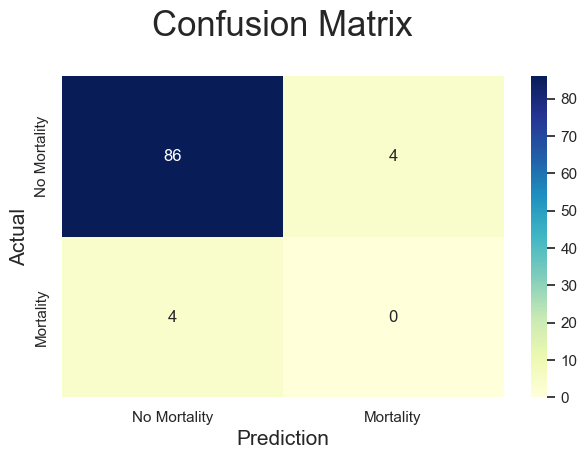

In [118]:
sns.set(style="whitegrid", palette="deep")
fig, axes = plt.subplots()
class_names=set(y)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt="g", xticklabels=['No Mortality', 'Mortality'], yticklabels=['No Mortality', 'Mortality'])
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y=1.1, fontsize=25)
plt.xlabel('Prediction', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.tight_layout()
plt.show()

### **Reporting the Confussion Matrix**

In [119]:
print(classification_report(y_test, y_pred, target_names=['No Mortality','Mortality'],zero_division=0))

              precision    recall  f1-score   support

No Mortality       0.96      0.96      0.96        90
   Mortality       0.00      0.00      0.00         4

    accuracy                           0.91        94
   macro avg       0.48      0.48      0.48        94
weighted avg       0.91      0.91      0.91        94



### **Obtaining the values for the ROC (Receiver Operating Characteristics) and AUC (Area Under the Curve)**

In [120]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

### **Plotting the ROC**

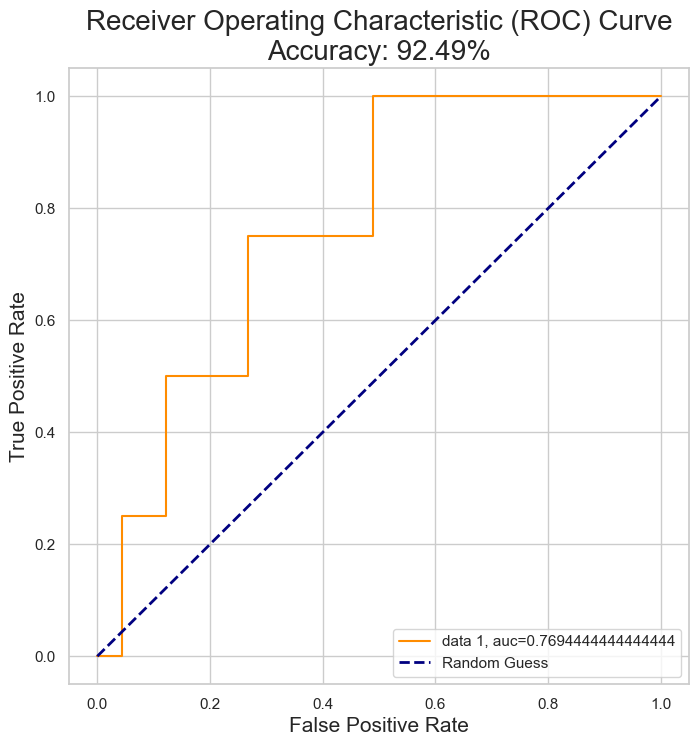

In [121]:
sns.set(style="whitegrid", palette="deep")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
plt.title("Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%".format(accuracy * 100), fontsize=20)
plt.plot(fpr,tpr, color="darkorange", label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.legend(loc=4)
plt.show()